# Introducción a la Ciencia de Datos: Tarea 1

Este notebook contiene el código de base para realizar la Tarea 1 del curso. Puede copiarlo en su propio repositorio y trabajar sobre el mismo.
Las **instrucciones para ejecutar el notebook** están en la [página inicial del repositorio](https://gitlab.fing.edu.uy/maestria-cdaa/intro-cd).

Se utiliza el lenguaje Python y la librería Pandas. Si no tiene ninguna familiaridad con la librería, se recomienda realizar algún tutorial introductorio (ver debajo).
También se espera que los alumnos sean proactivos a la hora de consultar las documentaciones de las librerías y del lenguaje, para entender el código provisto.
Además de los recursos provistos en la [página del curso](https://eva.fing.edu.uy/course/view.php?id=1378&section=1), los siguientes recursos le pueden resultar interesantes:
 - [Pandas getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) y [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html): Son parte de la documentación en la página oficial de Pandas.
 - [Kaggle Learn](https://www.kaggle.com/learn): Incluye tutoriales de Python y Pandas.


Si desea utilizar el lenguaje R y está dispuesto a no utilizar (o traducir) este código de base, también puede hacerlo.

En cualquier caso, **se espera que no sea necesario revisar el código para corregir la tarea**, ya que todos los resultados y análisis relevantes deberían estar en el **informe en formato PDF**.

####Monto Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Cargar bibliotecas (dependencias)
Recuerde instalar los requerimientos (`requirements.txt`) en el mismo entorno donde está ejecutando este notebook (ver [README](https://github.com/DonBraulio/introCD)).

In [ ]:
from time import time
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from wordcloud import WordCloud
from collections import Counter

# Agregue aqui el resto de las librerias que necesite
# from ...
# import ...

from nltk.corpus import stopwords
import spacy
import nltk



In [ ]:
pip install networkx matplotlib

## Lectura de Datos

In [ ]:
# DataFrame con todos los discursos:
df_speeches = pd.read_csv('/content/drive/MyDrive/IntroCD/tareas/Tarea1_grupo12/us_2020_election_speeches.csv')
df_speeches

speaker                                              title  \
0             David Perdue  Georgia Sen. David Perdue Speech Transcript at...   
1                Joe Biden  Joe Biden Southfield, MI Speech on Health Care...   
2             Donald Trump  Donald Trump Speech Transcript ‘Protecting Ame...   
3                Joe Biden      Joe Biden ABC Town Hall Transcript October 15   
4             Donald Trump   Donald Trump NBC Town Hall Transcript October 15   
..                     ...                                                ...   
264         Bernie Sanders  Bernie Sanders Speech Transcript: Sanders Spea...   
265  Democratic Candidates  Transcript: Speeches at the Iowa Caucuses – Be...   
266           Donald Trump  Donal Trump Iowa Rally Transcript: Trump Holds...   
267           Donald Trump  Donald Trump New Jersey Rally Speech Transcrip...   
268  Democratic Candidates          January Iowa Democratic Debate Transcript   

                                                  text          date  \
0    David Perdue: (00:01)\nHow great is it to be b...  Oct 16, 2020   
1    Joe Biden: (00:00)\nHello, Michigan. Hi, how a...  Oct 16, 2020   
2    President Trump: (00:30)\nThank you. What a ni...  Oct 16, 2020   
3    George Stephanopoulos: (00:41)\nHey, and welco...  Oct 15, 2020   
4    Savannah Guthrie: (03:50)\nIt’s nothing but no...  Oct 15, 2020   
..                                                 ...           ...   
264  Bernie Sanders: (00:00)\nJust want to take thi...   Feb 6, 2020   
265  Bernie Sanders: (00:08)\nThank you. Thank you....   Feb 4, 2020   
266  Donald Trump: (00:24)\nI worked so hard for th...  Jan 30, 2020   
267  Donald Trump: (01:22)\nThank you. Thank you. I...  Jan 28, 2020   
268  Wolf Blitzer: (00:00)\nAll right, so let’s beg...  Jan 15, 2020   

                 location             type  
0          Macon, Georgia  Campaign Speech  
1    Southfield ,Michigan  Campaign Speech  
2     Fort Myers, Florida  Campaign Speech  
3                     ABC        Town Hall  
4                     NBC        Town Hall  
..                    ...              ...  
264                  Iowa  Campaign Speech  
265                  Iowa  Campaign Speech  
266      Des Moines, Iowa  Campaign Speech  
267  Wildwood, New Jersey  Campaign Speech  
268      Des Moines, Iowa           Debate  

[269 rows x 6 columns]

# Parte 1: Cargado y Limpieza de Datos

## Exploración de Datos

In [ ]:
# TODO: Analice la cantidad de discursos por candidato

# Tome los 5 candidatos con más discursos
# df_speeches_top_5 = ...
df_speeches.info( )


"""
Con el método .info() se obtiene la siguiente tabla:

Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   speaker   266 non-null    object
 1   title     269 non-null    object
 2   text      269 non-null    object
 3   date      269 non-null    object
 4   location  251 non-null    object
 5   type      248 non-null    object

Esto significa que:

speaker: 266 no nulos → 3 discursos sin quien habla

title: 269 no nulos → OK

text: 269 no nulos → OK

date: 269 no nulos (pero aún como object)

location: 251 no nulos → 18 valores faltantes

type: 248 no nulos → 21 valores faltantes



"""




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   speaker   266 non-null    object
 1   title     269 non-null    object
 2   text      269 non-null    object
 3   date      269 non-null    object
 4   location  251 non-null    object
 5   type      248 non-null    object
dtypes: object(6)
memory usage: 12.7+ KB


'\nCon el método .info() se obtiene la siguiente tabla:\n\nData columns (total 6 columns):\n #   Column    Non-Null Count  Dtype\n---  ------    --------------  -----\n 0   speaker   266 non-null    object\n 1   title     269 non-null    object\n 2   text      269 non-null    object\n 3   date      269 non-null    object\n 4   location  251 non-null    object\n 5   type      248 non-null    object\n\nEsto significa que:\n\nspeaker: 266 no nulos → 3 discursos sin quien habla\n\ntitle: 269 no nulos → OK\n\ntext: 269 no nulos → OK\n\ndate: 269 no nulos (pero aún como object)\n\nlocation: 251 no nulos → 18 valores faltantes\n\ntype: 248 no nulos → 21 valores faltantes\n\n\n\n'

In [ ]:
# TODO: Analice la cantidad de discursos por candidato
print(f"Filas y columnas: {df_speeches.shape}")
duplicados = df_speeches.duplicated().sum()
print(f"\nCantidad de filas duplicadas: {duplicados}")

for col in ['speaker', 'title', 'location', 'type']:
    print(f"\nColumna {col} - cantidad de valores únicos: {df_speeches[col].nunique()}")

print("\nCantidad de discursos por locación:")
print(df_speeches['location'].value_counts())
print("\nCantidad de discursos por tipo:")
print(df_speeches['type'].value_counts())
# Tome los 5 candidatos con más discursos
df_speeches_top_5 = df_speeches[df_speeches['speaker'].isin(df_speeches['speaker'].value_counts().head(5).index)].copy()
print(df_speeches_top_5['speaker'].value_counts())
print(f"Filas y columnas: {df_speeches_top_5.shape}")
#se puede analizar todo de nuevo para este subset


Filas y columnas: (269, 6)

Cantidad de filas duplicadas: 0

Columna speaker - cantidad de valores únicos: 71

Columna title - cantidad de valores únicos: 269

Columna location - cantidad de valores únicos: 102

Columna type - cantidad de valores únicos: 9

Cantidad de discursos por locación:
location
Virtual                      62
Charlotte, North Carolina    35
Wilmington, Delaware          8
New Hampshire                 7
Fox News                      7
                             ..
Colorado Springs, CO          1
Reno, Nevada                  1
Salt Lake City                1
Norfolk, Virginia             1
Wildwood, New Jersey          1
Name: count, Length: 102, dtype: int64

Cantidad de discursos por tipo:
type
Campaign Speech       180
Town Hall              18
Interview              14
Debate                  9
Endorsement             8
Statement               8
Roundtable              8
Press Conference        2
Voter Mobilization      1
Name: count, dtype: int64
speaker


In [ ]:
print("\nCantidad de discursos por candidato:")
pd.set_option('display.max_rows', None)
print(df_speeches['speaker'].value_counts())
pd.reset_option('display.max_rows')


Cantidad de discursos por candidato:
speaker
Joe Biden                                 71
Donald Trump                              53
Mike Pence                                19
Bernie Sanders                            16
Kamala Harris                             11
Democratic Candidates                      8
Multiple Speakers                          5
Elizabeth Warren                           4
Pete Buttigieg                             4
Joe Biden,Kamala Harris                    4
Barack Obama                               3
Andrew Yang                                3
Mike Bloomberg                             3
Lindsey Graham, Jaime Harrison             2
Michelle Obama                             2
Cindy McCain                               2
Jill Biden                                 2
Kamala Harris, Mike Pence                  1
David Perdue                               1
Donald Trump, Joe Biden                    1
Ivanka Trump                               1
Tom Cotto

#####División de discursos con multiples speakers

######Funciones

In [ ]:

def build_pattern(speakers, aliases=None):
    """
    Construye una expresión regular que:
      - Detecta cada nombre de speaker (alias o nombre canónico)
      - Captura el timestamp "(mm:ss)" y todo el texto hasta el siguiente orador o el final

    Parámetros:
      speakers : list[str]
        Lista de nombres canónicos de los oradores.
      aliases : dict[str,str], opcional
        Mapeo {canónico: alias_en_texto}, p.ej. {"Tom Wolf": "Governor Tom Wolf"}.

    Devuelve:
      pattern : str
        Cadena con la regex para usar en re.findall.
    """
    aliases = aliases or {}
    # 2.1. Generar lista de todos los nombres posibles en el texto
    name_patterns = []
    for s in speakers:
        if s in aliases:
            name_patterns.append(re.escape(aliases[s]))   # alias primero
        name_patterns.append(re.escape(s))                # luego el nombre canónico
    # quitar duplicados manteniendo orden
    name_patterns = list(dict.fromkeys(name_patterns))
    # grupo de alternancia tipo "(Joe\ Biden|Governor\ Tom\ Wolf|...)"
    names_group = "|".join(name_patterns)

    # 2.2. Patrón completo:
    #    (?P<speaker>...)  → captura el nombre del speaker
    #    \(\d{2}:\d{2}\)   → timestamp
    #    (?P<speech>.*?)   → non-greedy texto hasta el próximo speaker o fin
    pattern = (
        rf"(?P<speaker>{names_group})\s*:\s*\(\d{{2}}:\d{{2}}\)"
        rf"(?P<speech>.*?)(?=(?:{names_group})\s*:\s*\(\d{{2}}:\d{{2}}\)|$)"
    )
    return pattern

def split_speech_row(row, speakers, aliases=None):
    """
    Separa una fila con varios oradores en varias filas,
    una por cada speaker, manteniendo las demás columnas idénticas.

    Parámetros:
      row       : pd.Series
        La fila original del DataFrame.
      speakers  : list[str]
        Lista de nombres canónicos para extraer.
      aliases   : dict[str,str], opcional
        Mapeo {canónico: alias_en_texto}.

    Devuelve:
      pd.DataFrame
        DataFrame con una fila por speaker y su texto limpio.
    """
    aliases = aliases or {}
    pattern = build_pattern(speakers, aliases)
    text = row['text']

    #Extraer todos los bloques con .findall
    matches = re.findall(pattern, text, flags=re.DOTALL)

    #Inicializar contenedor de texto por orador
    speeches = {s: "" for s in speakers}
    # Invertir el mapeo alias→canónico para reconocimiento
    reverse_map = {aliases.get(s, s): s for s in speakers}

    #Acumular cada fragmento en su orador correspondiente
    for spk, speech in matches:
        canonical = reverse_map.get(spk, spk)
        if canonical in speeches:
            speeches[canonical] += speech.strip() + " "

    #Construir nuevas filas
    rows = []
    base = row.to_dict()
    for speaker, full_text in speeches.items():
        cleaned = full_text.strip()
        if cleaned:
            new = base.copy()
            new['speaker'] = speaker
            new['text']    = cleaned
            rows.append(new)

    #Devolver DataFrame (equivalente a un explode de filas)
    return pd.DataFrame(rows)


def apply_split_for_label(df, cfg):
    """
    Aplica split_speech_row a todas las filas cuyo 'speaker' coincide con cfg['label'].

    Parámetros:
      df  : pd.DataFrame
      cfg : dict con keys
        - 'label'    : texto exacto en df['speaker'] a procesar
        - 'speakers' : lista de oradores para separar
        - 'aliases'  : (opcional) mapeo de alias

    Flujo:
      1. Filtrar filas con speaker==label
      2. Por cada fila, generar sub-DataFrame con split_speech_row
      3. Quitar filas originales y concatener las nuevas
    """
    label    = cfg['label']
    speakers = cfg['speakers']
    aliases  = cfg.get('aliases', {})

    #Máscara de filas a procesar
    mask = df['speaker'] == label
    if not mask.any():
        return df  # nada que hacer

    #Generar sub-DataFrames para cada fila combinada
    parts = [ split_speech_row(row, speakers, aliases)
              for _, row in df[mask].iterrows() ]

    #Reconstruir df sin las filas antiguas + las nuevas
    df = df[~mask].copy()
    df = pd.concat([df] + parts, ignore_index=True)
    return df


######Configuraciones
Se definen qué combinaciones de “speaker” deben separarse

In [ ]:
# ---------------------------------------------
# Definición de configuraciones
# ---------------------------------------------
configs = [
    {
        "label":   "Joe Biden,Tom Wolf",
        "speakers": ["Joe Biden", "Tom Wolf"],
        "aliases": {"Tom Wolf": "Governor Tom Wolf"}
    },
    {
        "label":   "Joe Biden, Hillary Clinton",
        "speakers": ["Joe Biden", "Hillary Clinton"],
        # sin aliases → usa exactamente esos nombres
    },
    {
        "label":   "Joe Biden, Al Gore",
        "speakers": ["Joe Biden", "Al Gore"],
        "aliases": {"Al Gore": "Governor Al Gore"}
    },
    {
        "label":   "Kamala Harris, Mike Pence",
        "speakers": ["Kamala Harris", "Mike Pence", "Susan Page"]
    },
    {
        "label":   "Donald Trump, Joe Biden",
        "speakers": ["Donald Trump", "Joe Biden", "Chris Wallace"]
    },
    {
        "label":   "Joe Biden,Kamala Harris",
        "speakers": [
            "Joe Biden", "Kamala Harris",
            "Speaker 1", "Vanessa Montes-Cazarez", "Speaker 2", "Speaker 3"
        ]
    },
    {
        "label":   "Joe Biden, Bernie Sanders",
        "speakers": ["Joe Biden", "Bernie Sanders", "Jake Tapper", "Anderson Cooper"]
    }
]


######Ejecución de la separación y reordenamiento de las filas
Recorremos configs y vamos “explotando” cada fila combinada en varias

In [ ]:
import re


#Rastrear posición original para mantener orden
df_speeches['orig_index'] = df_speeches.index

#Iterar sobre cada caso y aplicar la separación
for cfg in configs:
    df_speeches = apply_split_for_label(df_speeches, cfg)

# ---------------------------------------------
# Reordenar por fecha y posición original
# ---------------------------------------------
# Convertir 'date' a datetime si no lo está:
df_speeches['date'] = pd.to_datetime(df_speeches['date'], format='%b %d, %Y')

# Ordenar primero por fecha cronológica y luego por posición
df_speeches.sort_values(by=['date','orig_index'], inplace=True)

# Resetear índice final limpio
df_speeches.reset_index(drop=True, inplace=True)

df_speeches


speaker                                              title  \
0    Democratic Candidates          January Iowa Democratic Debate Transcript   
1             Donald Trump  Donald Trump New Jersey Rally Speech Transcrip...   
2             Donald Trump  Donal Trump Iowa Rally Transcript: Trump Holds...   
3    Democratic Candidates  Transcript: Speeches at the Iowa Caucuses – Be...   
4           Bernie Sanders  Bernie Sanders Speech Transcript: Sanders Spea...   
..                     ...                                                ...   
282           Donald Trump  Donald Trump Campaign Rally Greenville, NC Tra...   
283             Mike Pence  Mike Pence Campaign Speech Miami Transcript Oc...   
284           David Perdue  Georgia Sen. David Perdue Speech Transcript at...   
285              Joe Biden  Joe Biden Southfield, MI Speech on Health Care...   
286           Donald Trump  Donald Trump Speech Transcript ‘Protecting Ame...   

                                                  text       date  \
0    Wolf Blitzer: (00:00)\nAll right, so let’s beg... 2020-01-15   
1    Donald Trump: (01:22)\nThank you. Thank you. I... 2020-01-28   
2    Donald Trump: (00:24)\nI worked so hard for th... 2020-01-30   
3    Bernie Sanders: (00:08)\nThank you. Thank you.... 2020-02-04   
4    Bernie Sanders: (00:00)\nJust want to take thi... 2020-02-06   
..                                                 ...        ...   
282  Donald Trump: (01:25)\nThank you very much. Th... 2020-10-15   
283  Pedro Fuentes Cid: (01:08)\nYeah, my name is P... 2020-10-15   
284  David Perdue: (00:01)\nHow great is it to be b... 2020-10-16   
285  Joe Biden: (00:00)\nHello, Michigan. Hi, how a... 2020-10-16   
286  President Trump: (00:30)\nThank you. What a ni... 2020-10-16   

                        location             type  orig_index  
0               Des Moines, Iowa           Debate         268  
1           Wildwood, New Jersey  Campaign Speech         267  
2               Des Moines, Iowa  Campaign Speech         266  
3                           Iowa  Campaign Speech         265  
4                           Iowa  Campaign Speech         264  
..                           ...              ...         ...  
282  Greenville, North Carolina   Campaign Speech           5  
283               Miami, Florida  Campaign Speech           6  
284               Macon, Georgia  Campaign Speech           0  
285         Southfield ,Michigan  Campaign Speech           1  
286          Fort Myers, Florida  Campaign Speech           2  

[287 rows x 7 columns]

#####Dataframe con los speakers top 5

In [ ]:
#Reescribo el dataframe:

#Para la columna datetime, cambio dtype de objeto a dtype object
df_speeches['date'] = pd.to_datetime(df_speeches['date'])

#Como vamos a agrupar por candidatos(columna speaker) vamos a elimiar las filas en dónde su campo es nulo(en éste caso tres)
df_speeches.dropna(subset=['speaker'])


#Como location y type son campos por los que no se va a agrupar, pero tenemos que retener la información de esa fila
# lo mejor es no perder esas filas y luego poder filtrar o agrupar en caso de necesitar.
df_speeches['location'] = df_speeches['location'].fillna('unknown')
df_speeches['type']     = df_speeches['type'].fillna('unknown')

df_speeches.info( )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   speaker     284 non-null    object        
 1   title       287 non-null    object        
 2   text        287 non-null    object        
 3   date        287 non-null    datetime64[ns]
 4   location    287 non-null    object        
 5   type        287 non-null    object        
 6   orig_index  287 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 15.8+ KB


In [ ]:
#Tras eliminar los nulos en speaker:
df_clean = df_speeches.copy()
counts = ( df_clean
           .groupby('speaker')
           .size()
           .reset_index(name='n_discursos')
           .sort_values('n_discursos', ascending=False) )

top5 = counts['speaker'].head(5).tolist()
print(top5)


['Joe Biden', 'Donald Trump', 'Mike Pence', 'Bernie Sanders', 'Kamala Harris']


In [ ]:
#Filtrar sólo los discursos de los 5 candidatos con más registros
df_top5 = df_clean[df_clean['speaker'].isin(top5)].copy()
df_top5

speaker                                              title  \
1      Donald Trump  Donald Trump New Jersey Rally Speech Transcrip...   
2      Donald Trump  Donal Trump Iowa Rally Transcript: Trump Holds...   
4    Bernie Sanders  Bernie Sanders Speech Transcript: Sanders Spea...   
8      Donald Trump  Donald Trump New Hampshire Rally Transcript Fe...   
11   Bernie Sanders  Bernie Sanders New Hampshire Town Hall Transcript   
..              ...                                                ...   
281    Donald Trump   Donald Trump NBC Town Hall Transcript October 15   
282    Donald Trump  Donald Trump Campaign Rally Greenville, NC Tra...   
283      Mike Pence  Mike Pence Campaign Speech Miami Transcript Oc...   
285       Joe Biden  Joe Biden Southfield, MI Speech on Health Care...   
286    Donald Trump  Donald Trump Speech Transcript ‘Protecting Ame...   

                                                  text       date  \
1    Donald Trump: (01:22)\nThank you. Thank you. I... 2020-01-28   
2    Donald Trump: (00:24)\nI worked so hard for th... 2020-01-30   
4    Bernie Sanders: (00:00)\nJust want to take thi... 2020-02-06   
8    Donald Trump: (02:41)\nHello, Manchester, and ... 2020-02-10   
11   Bernie Sanders: (00:00)\nThank you. Thank you ... 2020-02-10   
..                                                 ...        ...   
281  Savannah Guthrie: (03:50)\nIt’s nothing but no... 2020-10-15   
282  Donald Trump: (01:25)\nThank you very much. Th... 2020-10-15   
283  Pedro Fuentes Cid: (01:08)\nYeah, my name is P... 2020-10-15   
285  Joe Biden: (00:00)\nHello, Michigan. Hi, how a... 2020-10-16   
286  President Trump: (00:30)\nThank you. What a ni... 2020-10-16   

                        location             type  orig_index  
1           Wildwood, New Jersey  Campaign Speech         267  
2               Des Moines, Iowa  Campaign Speech         266  
4                           Iowa  Campaign Speech         264  
8                  New Hampshire  Campaign Speech         257  
11                 New Hampshire        Town Hall         260  
..                           ...              ...         ...  
281                          NBC        Town Hall           4  
282  Greenville, North Carolina   Campaign Speech           5  
283               Miami, Florida  Campaign Speech           6  
285         Southfield ,Michigan  Campaign Speech           1  
286          Fort Myers, Florida  Campaign Speech           2  

[186 rows x 7 columns]

## Visualizaciones

##Contexto teorico

### Media Móvil Simple

Una Media Móvil Simple (SMA, del inglés Simple Moving Average) es un promedio aritmético que suaviza una serie temporal para revelar su tendencia subyacente.

- La media móvil funciona como un “suavizador” de la serie temporal. En vez de quedarnos con el valor de un solo día, calculamos el promedio de ese día y de los N días anteriores para cada punto en el tiempo. Así, cada nuevo valor de la serie resulta de condensar lo que ocurrió en ese pequeño tramo de días, atenuando los picos y valles aislados y mostrando con más claridad la tendencia general. Si en el arranque no hay suficientes días, basta con promediar los que sí estén disponibles para no dejar espacios vacíos. Finalmente, si quisiéramos centrar ese promedio —en lugar de mirar solo hacia atrás— podríamos repartir la ventana a ambos lados del día en cuestión, obteniendo una curva aún más “alineada” con los máximos y mínimos reales
  
- **Parámetros clave**  
  - **`window = N`**: tamaño de la ventana (por ejemplo, 7 o 14 días).  
  - **`min_periods`**: mínimo de días necesarios para calcular (p. ej. `min_periods=1` evita valores vacíos al inicio).  
  - **`center`**:  
    - `center=False` (por defecto) usa solo días pasados: ideal para un análisis técnico o causal, porque refleja la tendencia basada únicamente en información histórica.  
    - `center=True` reparte la ventana antes y después de cada día: produce una curva más centrada y estética, pero “mira al futuro”, por lo que no es adecuada si necesitas estricta causalidad.

- **¿Para qué sirve?**  
  1. **Reducir ruido de corto plazo** y destacar la dirección general.  
  2. **Comparar horizontes**: SMA corta (7 días) muestra reacciones inmediatas; SMA más larga (14 días) revela la tendencia a mediano plazo.  
  3. **Alineación de picos**: usando `center=True` alineas visualmente picos y valles, pero con desfase, mientras que con `center=False` mantienes fidelidad a la secuencia temporal real.


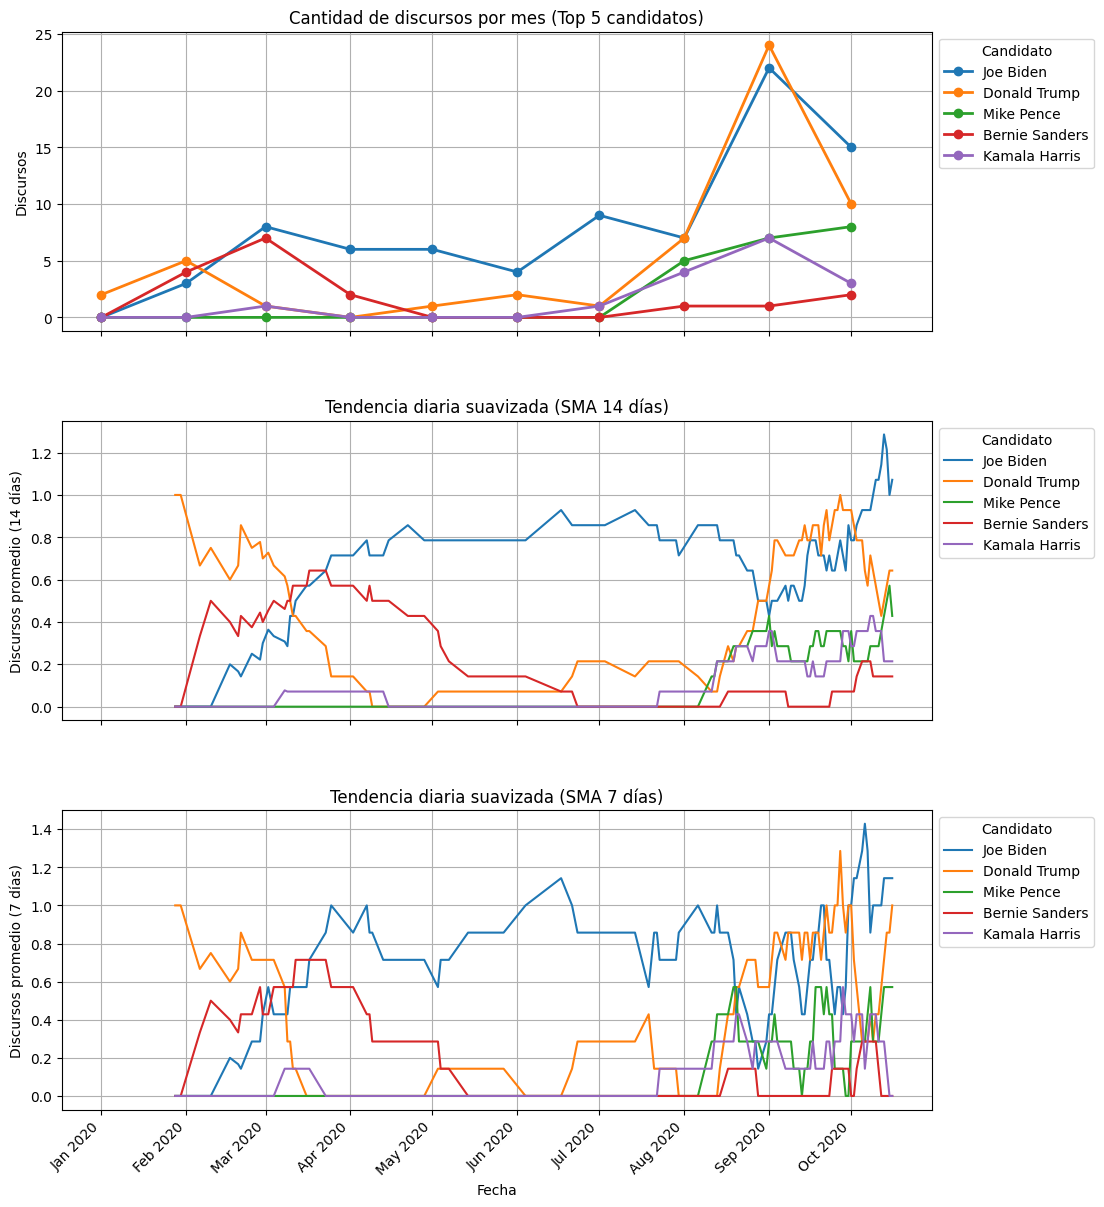

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --------------------------
# 1. PREPARACIÓN DE DATOS
# --------------------------

# Definir top5 candidatos para un orden consistente en las gráficas
top5 = df_top5['speaker'].value_counts().nlargest(5).index.tolist()

# --- Agregación mensual ---
# year_month: PeriodIndex con resolución mensual (e.g., '2020-03')
# Método: .dt.to_period('M')
df_top5['date'] = pd.to_datetime(df_top5['date'], errors='coerce')
df_top5['year_month'] = df_top5['date'].dt.to_period('M')

# Conteo de discursos por mes y candidato
df_monthly = (
    df_top5
    .groupby(['year_month', 'speaker'])
    .size()
    .unstack(fill_value=0)
)

# Convertir PeriodIndex a DatetimeIndex para que Matplotlib lo trate como tiempo continuo
df_monthly.index = df_monthly.index.to_timestamp()

# --- Agrupación diaria ---
# Conteo de discursos por día y candidato
df_grouped = (
    df_top5
    .groupby(['date', 'speaker'])
    .size()
    .unstack(fill_value=0)
)


# --------------------------------
# 2. CÁLCULO DE MEDIAS MÓVILES
# --------------------------------

# SMA-14 (Media Móvil Simple 14 días)
# Método: DataFrame.rolling(window=14, min_periods=1).mean()
#   - window=14: ventana de 14 días
#   - min_periods=1: mínimo 1 dato para calcular (evita NaNs al inicio)
df_sma14 = df_grouped.rolling(window=14, min_periods=1).mean()

# SMA-7 (Media Móvil Simple 7 días)
# Método: DataFrame.rolling(window=7, min_periods=1).mean()
df_sma7 = df_grouped.rolling(window=7, min_periods=1).mean()


# --------------------------
# 3. VISUALIZACIÓN
# --------------------------

# Creamos figura con 3 filas x 1 columna, compartiendo eje X
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 14), sharex=True)

# --- Subplot 1: Conteo mensual ---
for cand in top5:
    axes[0].plot(
        df_monthly.index,
        df_monthly[cand],
        marker='o',
        linewidth=2,
        label=cand
    )
axes[0].set_title('Cantidad de discursos por mes (Top 5 candidatos)')
axes[0].set_ylabel('Discursos')
axes[0].grid(True)
axes[0].legend(title='Candidato', loc='upper left', bbox_to_anchor=(1.0, 1.0))

# --- Subplot 2: Tendencia diaria suavizada (SMA 14 días) ---
for cand in top5:
    axes[1].plot(
        df_sma14.index,
        df_sma14[cand],
        linewidth=1.5,
        label=cand
    )
axes[1].set_title('Tendencia diaria suavizada (SMA 14 días)')
axes[1].set_ylabel('Discursos promedio (14 días)')
axes[1].grid(True)
axes[1].legend(title='Candidato', loc='upper left', bbox_to_anchor=(1.0, 1.0))

# --- Subplot 3: Tendencia diaria suavizada (SMA 7 días) ---
for cand in top5:
    axes[2].plot(
        df_sma7.index,
        df_sma7[cand],
        linewidth=1.5,
        label=cand
    )
axes[2].set_title('Tendencia diaria suavizada (SMA 7 días)')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Discursos promedio (7 días)')
axes[2].grid(True)
axes[2].legend(title='Candidato', loc='upper left', bbox_to_anchor=(1.0, 1.0))

# --------------------------
# 4. FORMATO EJE X
# --------------------------

# Locator: un tick por mes
locator = mdates.MonthLocator()
# Formatter: etiqueta como 'Mar 2020'
formatter = mdates.DateFormatter('%b %Y')

for ax in axes:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

# Rotar etiquetas de la última fila para mejorar legibilidad
plt.setp(axes[-1].get_xticklabels(), rotation=45, ha='right')

# Ajustar espacio para leyendas fuera
fig.subplots_adjust(right=0.85, hspace=0.3)

plt.show()


###Observaciones
####Mensual
**Joe Biden**
Comienza casi inactivo en enero–febrero, sube con fuerza en marzo (7 discursos) y mantiene un flujo moderado (4–5/mes) hasta julio, cuando da un salto a 9. El pico máximo es en septiembre (20) antes de bajar ligeramente en octubre (14).

**Donald Trump**
Empieza con 2 discursos en enero, tiene un pequeño repunte en febrero (5), luego cae a 1–2/mes hasta agosto, y en septiembre alcanza su máximo (24) —el mes más “movido” globalmente— antes de descender a 10 en octubre.

**Mike Pence**
Prácticamente ausente hasta julio, luego se incorpora con 5 discursos en agosto, 7 en septiembre y 7 en octubre, mostrando su actividad creciente en el último tercio del período.

**Bernie Sanders**
Concentró casi toda su actividad en marzo (6) y abril (2), para casi desaparecer de mayo en adelante (1–2/mes o cero). Refleja que su campaña principal fue pre-primarias.

**Kamala Harris**
Prácticamente nula hasta agosto (2 discursos), luego un pico en septiembre (6) y se reduce en octubre (1). Muestra una entrada tardía, ligada a su anuncio de candidatura y debates de Vicepresidentes.

Lo más relevante es el mes de setiembre,recta final antes de la elecciones, donde Biden y Trump concentran sus máximos de discursos.

Los candidatos con menor perfil (Sanders, Harris, Pence) tienen ratos muy focalizados: Sanders en marzo, Harris y Pence a partir de agosto.


####Tendencia suavizada de 14 días

Con 14 días eliminamos casi todo el ruido semanal, revalndo tendencias a mediano plazo.

Biden ya estabiliza su promedio en ~0.7–0.8 discursos/día desde abril hasta poco antes de la campaña final, cuando sube hacia ~1.0.

Trump muestra claramente tres fases: alta actividad inicial (enero-febrero), declive prolongado y recuperación lenta desde julio hasta ~0.9 en septiembre.

Sanders queda casi “aplanado” después de marzo, y Harris y Pence sólo emergen con una rampa suave en el último tercio.

####Tendencia suavizada de 7 días
Detección de subidas súbitas, ya que la ventana de 7 días conserva más variabilidad. A grandes rasgos Revela cómo reaccionan los candidatos a eventos concretos (debates, convenciones) con subidas y caídas que no se aprecian en el agregado mensual.

Se aprecia una rápida subida de Sanders en marzo, que alcanza ~0.7 discursos/día (equivalente a 5–6 en una semana) y luego cae.

Biden muestra un ascenso constante desde marzo hasta un pico de ~1.2 discursos/día en octubre.

Trump cae fuerte en abril–junio (~0.1–0.2) y luego sube de mayo en adelante, recuperando ~1.3 en septiembre.

Pence y Harris comienzan a marcar tendencia apenas entran en campaña: Harris ronda 0.3–0.5 en septiembre y Pence 0.5–0.6.

## Reflexiones finales

En septiembre, cuando el recuento mensual de discursos alcanza su punto más alto para Biden y Trump, vemos en la curva de 14 días que ese repunte no es un simple pico aislado sino una tendencia sostenida: la línea se inclina claramente hacia arriba desde julio, confirmando que ambos construyeron un gran impulso en esa fase de campaña. Al mismo tiempo, la versión de 7 días resalta las respuestas más inmediatas a eventos puntuales.

Por ejemplo, pequeños saltos en la actividad de Biden tras debates clave o fluctuaciones más abruptas de Trump alrededor de anuncios específicos que el promedio de dos semanas suaviza. Mientras Sanders dispara su actividad en marzo y luego cae bruscamente (algo que la SMA-14 atenúa pero la SMA-7 evidencia con claridad en sus subidas repentinas).

Harris y Pence apenas emergen en agosto, con una pendiente suave en la media de 14 días y picos semanales que delatan su entrada en escena. Así, al superponer recuento mensual y medias móviles de 14 y 7 días obtenemos un relato continuo: los hitos generales, la confirmación de su persistencia y la intensidad de las reacciones inmediatas, todo en un solo flujo interpretativo.
  



## Limpieza de Texto y Conteo de Palabras

In [ ]:
def clean_text(df, column_name):

    # Eliminar primeras palabras hasta el primer "\n"
    result = df[column_name].str.replace(r"^[^\n]*\n", "", regex=True)

    # Convertir todo a minúsculas
    result = result.str.lower()

    # TODO: completar signos de puntuación faltantes
    for punc in ["[", "\n", ",", ":", "?", ".", ")", "(", "!", "”", "%"]: ###agregué 7 signos
        result = result.str.replace(punc, " ")

    result = result.str.replace("’", "'", regex=False) #esto va a servir para que anden las stepwords

    return result

# TODO: Creamos una nueva columna CleanText a partir de text
df_top5["CleanText"] = clean_text(df_top5, "text")
df_top5

speaker                                              title  \
1      Donald Trump  Donald Trump New Jersey Rally Speech Transcrip...   
2      Donald Trump  Donal Trump Iowa Rally Transcript: Trump Holds...   
4    Bernie Sanders  Bernie Sanders Speech Transcript: Sanders Spea...   
8      Donald Trump  Donald Trump New Hampshire Rally Transcript Fe...   
11   Bernie Sanders  Bernie Sanders New Hampshire Town Hall Transcript   
..              ...                                                ...   
281    Donald Trump   Donald Trump NBC Town Hall Transcript October 15   
282    Donald Trump  Donald Trump Campaign Rally Greenville, NC Tra...   
283      Mike Pence  Mike Pence Campaign Speech Miami Transcript Oc...   
285       Joe Biden  Joe Biden Southfield, MI Speech on Health Care...   
286    Donald Trump  Donald Trump Speech Transcript ‘Protecting Ame...   

                                                  text       date  \
1    Donald Trump: (01:22)\nThank you. Thank you. I... 2020-01-28   
2    Donald Trump: (00:24)\nI worked so hard for th... 2020-01-30   
4    Bernie Sanders: (00:00)\nJust want to take thi... 2020-02-06   
8    Donald Trump: (02:41)\nHello, Manchester, and ... 2020-02-10   
11   Bernie Sanders: (00:00)\nThank you. Thank you ... 2020-02-10   
..                                                 ...        ...   
281  Savannah Guthrie: (03:50)\nIt’s nothing but no... 2020-10-15   
282  Donald Trump: (01:25)\nThank you very much. Th... 2020-10-15   
283  Pedro Fuentes Cid: (01:08)\nYeah, my name is P... 2020-10-15   
285  Joe Biden: (00:00)\nHello, Michigan. Hi, how a... 2020-10-16   
286  President Trump: (00:30)\nThank you. What a ni... 2020-10-16   

                        location             type  orig_index year_month  \
1           Wildwood, New Jersey  Campaign Speech         267    2020-01   
2               Des Moines, Iowa  Campaign Speech         266    2020-01   
4                           Iowa  Campaign Speech         264    2020-02   
8                  New Hampshire  Campaign Speech         257    2020-02   
11                 New Hampshire        Town Hall         260    2020-02   
..                           ...              ...         ...        ...   
281                          NBC        Town Hall           4    2020-10   
282  Greenville, North Carolina   Campaign Speech           5    2020-10   
283               Miami, Florida  Campaign Speech           6    2020-10   
285         Southfield ,Michigan  Campaign Speech           1    2020-10   
286          Fort Myers, Florida  Campaign Speech           2    2020-10   

                                             CleanText  
1    thank you  thank you  i love new jersey and i'...  
2    i worked so hard for this state  i worked so h...  
4    just want to take this opportunity to thank al...  
8    hello  manchester  and i am thrilled to be in ...  
11   thank you  thank you all for coming out  let m...  
..                                                 ...  
281  it's nothing but noise  what  okay  all right ...  
282  thank you very much  thank you  let's see  it'...  
283  yeah  my name is pedro fuentes cid  i'm a cuba...  
285  hello  michigan  hi  how are you  what's your ...  
286  thank you  what a nice group  thank you very m...  

[186 rows x 9 columns]

In [ ]:
# Convierte párrafos en listas "palabra1 palabra2 palabra3" -> ["palabra1", "palabra2", "palabra3"]
df_top5["WordList"] = df_top5["CleanText"].str.split()

# Veamos la nueva columna creada: notar que a la derecha tenemos una lista: [palabra1, palabra2, palabra3]
df_top5[["CleanText", "WordList"]]

CleanText  \
1    thank you  thank you  i love new jersey and i'...   
2    i worked so hard for this state  i worked so h...   
4    just want to take this opportunity to thank al...   
8    hello  manchester  and i am thrilled to be in ...   
11   thank you  thank you all for coming out  let m...   
..                                                 ...   
281  it's nothing but noise  what  okay  all right ...   
282  thank you very much  thank you  let's see  it'...   
283  yeah  my name is pedro fuentes cid  i'm a cuba...   
285  hello  michigan  hi  how are you  what's your ...   
286  thank you  what a nice group  thank you very m...   

                                              WordList  
1    [thank, you, thank, you, i, love, new, jersey,...  
2    [i, worked, so, hard, for, this, state, i, wor...  
4    [just, want, to, take, this, opportunity, to, ...  
8    [hello, manchester, and, i, am, thrilled, to, ...  
11   [thank, you, thank, you, all, for, coming, out...  
..                                                 ...  
281  [it's, nothing, but, noise, what, okay, all, r...  
282  [thank, you, very, much, thank, you, let's, se...  
283  [yeah, my, name, is, pedro, fuentes, cid, i'm,...  
285  [hello, michigan, hi, how, are, you, what's, y...  
286  [thank, you, what, a, nice, group, thank, you,...  

[186 rows x 2 columns]

# Parte 2: Conteo de Palabras y Visualizaciones

 #### Candidatos con mayor cantidad de palabras

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ---------------------
# Listado de STOPWORDS
# --------------------
# Descargamos la lista de stopwords en inglés
nltk.download('stopwords')
# Creamos un conjunto de palabras vacías para filtrar
stop_words = set(stopwords.words('english'))

# Lista de candidatos únicos (Top 5)
candidates = df_top5['speaker'].unique()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


####Conteo y visualización con stopwords

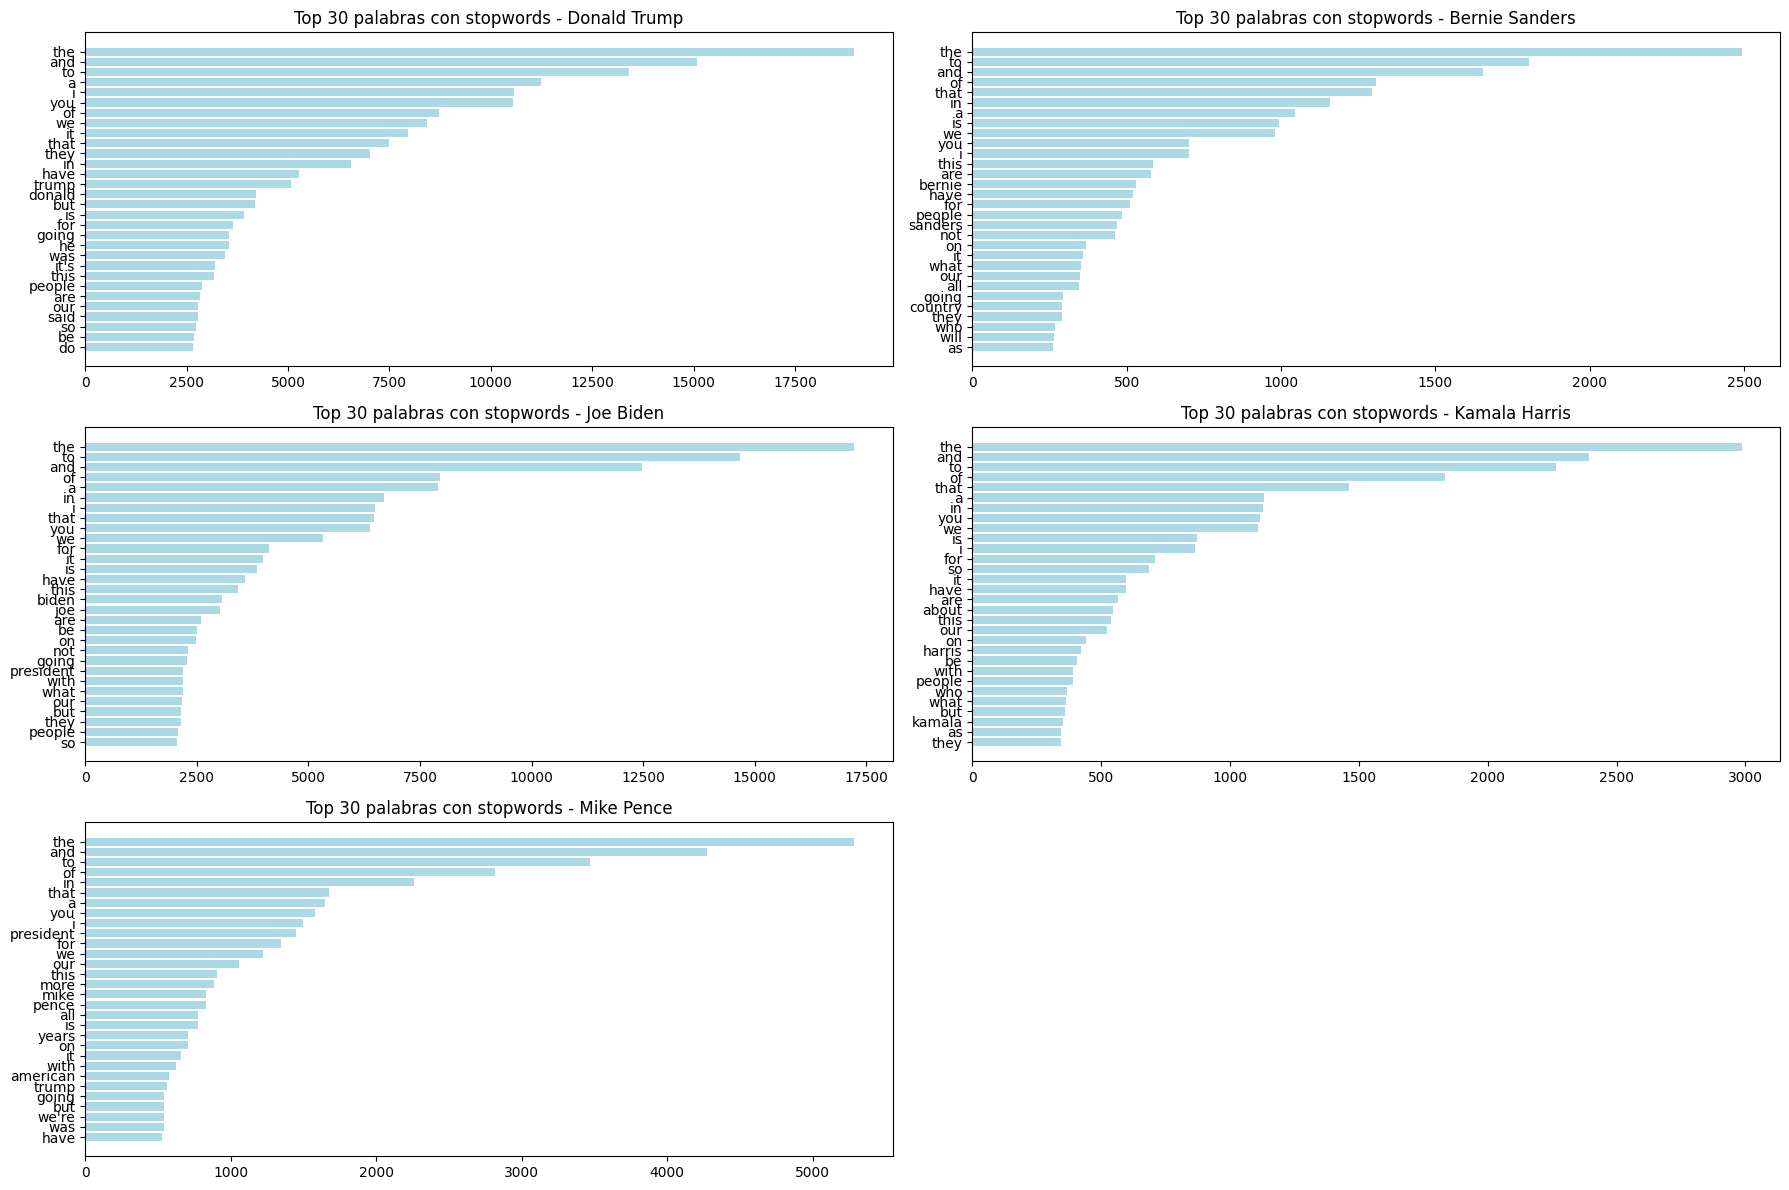

In [ ]:

# En este bloque mantenemos todas las palabras sin filtrar, para observar
# cómo las stopwords (términos muy frecuentes sin contenido relevante)
# dominan el ranking y justificar su eliminación posteriormente.

#Listado de candidatos únicos (Top 5)
candidates = df_top5['speaker'].unique()

#Crear figura con 3 filas x 2 columnas para hasta 6 candidatos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
axes = axes.flatten()

#Bucle sobre cada candidato
for idx, speaker in enumerate(candidates):
    #Extraer la columna WordList para el candidato (serie de listas)
    candidate_words_series = df_top5[df_top5['speaker'] == speaker]["WordList"]

    #Aplanar listas de palabras en una sola lista
    all_words = sum(candidate_words_series, [])

    #Contar frecuencia de cada palabra (incluyendo stopwords)
    word_counts = Counter(all_words)

    #Seleccionar las 30 palabras más frecuentes
    common_words = word_counts.most_common(30)
    words, counts = zip(*common_words)

    #Graficar barras horizontales
    axes[idx].barh(words, counts, color='lightblue')
    axes[idx].set_title(f"Top 30 palabras con stopwords - {speaker}")
    axes[idx].invert_yaxis()  # Mostrar la palabra más frecuente arriba

# Una vez terminado el bucle, ocultamos ejes extras:
for ax in axes[len(candidates):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

####Conteo y visualización sin stopwords

**¿Por qué eliminar stopwords?**  
Las _stopwords_ (artículos, preposiciones y otros términos muy frecuentes) suelen dominar los conteos de palabras sin aportar contenido semántico relevante. Al filtrarlas, nos centramos en los términos que realmente definen los temas y el estilo de cada candidato, mejorando la calidad del análisis.



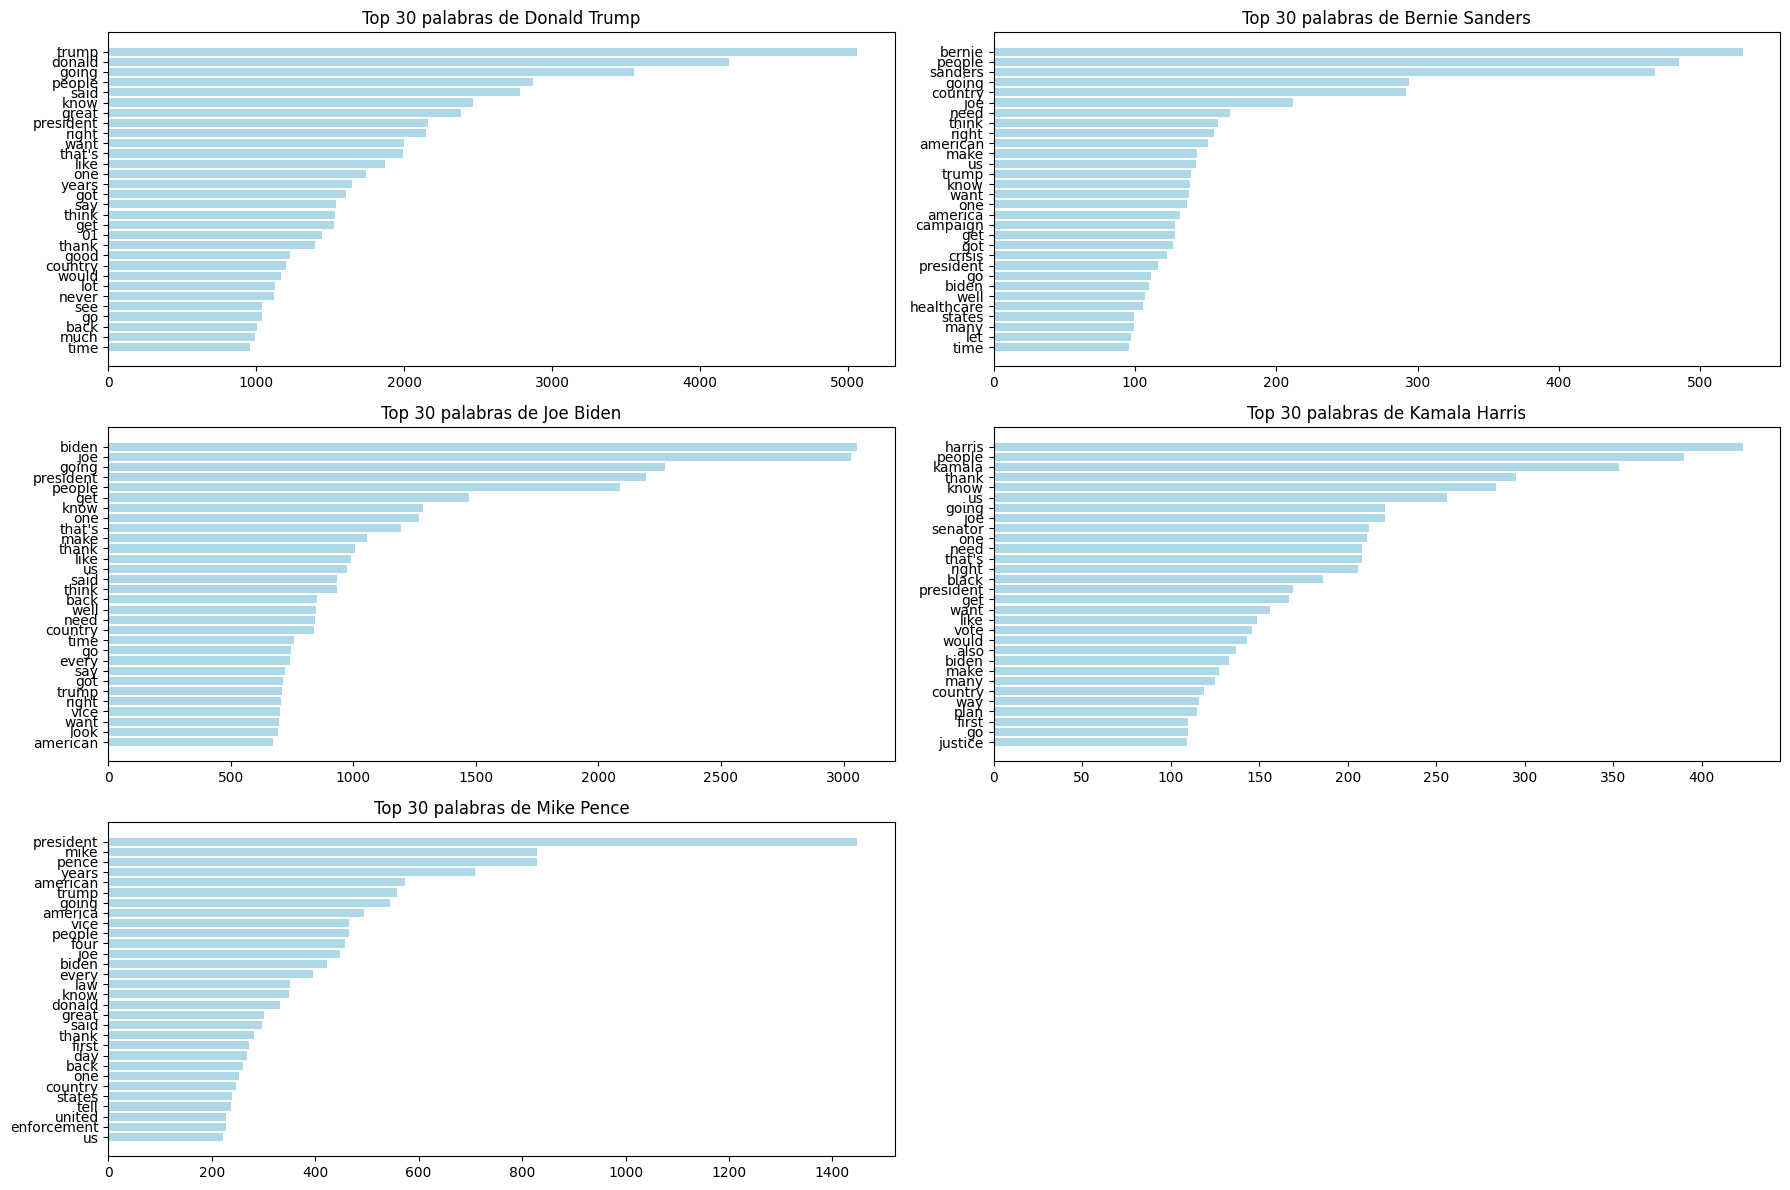

In [ ]:
# Creamos figuras con 3 filas y 2 columnas
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, speaker in enumerate(candidates):
    #Extraemos listas de palabras de cada discurso del candidato
    candidate_words = df_top5[df_top5['speaker'] == speaker]["WordList"]
    #Unificamos la lista de listas en una sola lista de palabras
    all_words = sum(candidate_words, [])
    #Filtramos las stopwords (palabras muy frecuentes sin valor semántico)
    filtered_words = [word for word in all_words if word.lower() not in stop_words]
    #Contar frecuencia de cada palabra
    word_counts = Counter(filtered_words)
    #Seleccionar las 30 palabras más comunes
    common_words = word_counts.most_common(30)
    words, counts = zip(*common_words)
    #Graficar barras horizontales
    axes[idx].barh(words, counts, color='lightblue')
    axes[idx].set_title(f"Top 30 palabras sin stopwords de {speaker}")
    axes[idx].invert_yaxis()  # Ordenar de mayor a menor

#Una vez terminado el bucle, ocultamos ejes extras:
for ax in axes[len(candidates):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

####Visualización con wordcloud

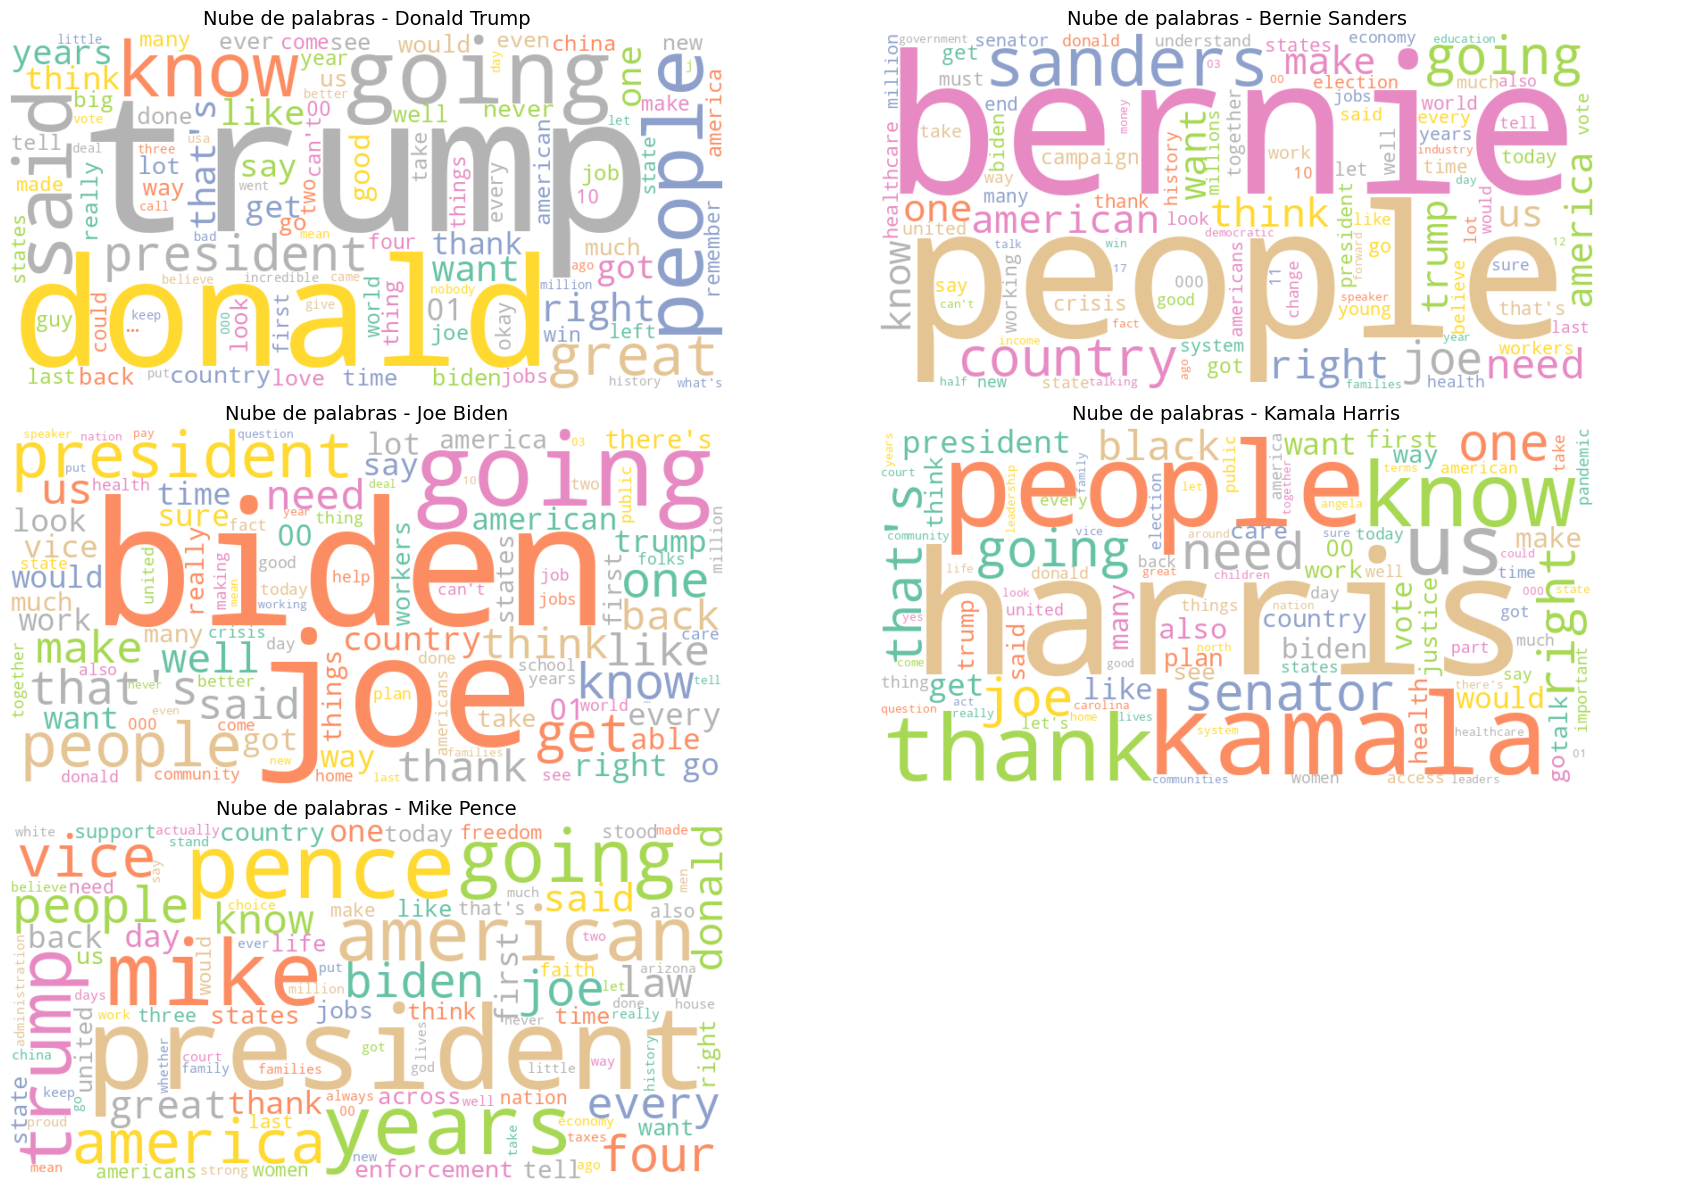

In [ ]:

from wordcloud import WordCloud


fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, speaker in enumerate(df_top5['speaker'].unique()):
    #Filtrar discursos del candidato
    candidate_words = df_top5[df_top5['speaker'] == speaker]["WordList"]
    all_words = sum(candidate_words, [])  # aplanar lista de listas

    #Eliminar stopwords
    filtered_words = [word for word in all_words if word.lower() not in stop_words]

    #Contar palabras
    word_counts = Counter(filtered_words)

    #Crear la nube de palabras
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='Set2',
        max_words=100
    ).generate_from_frequencies(word_counts)

    #Mostrar en subplot
    axes[idx].imshow(wc, interpolation='bilinear')
    axes[idx].set_title(f"Nube de palabras - {speaker}", fontsize=14)
    axes[idx].axis('off')

#Ocultar subplots vacíos si hay menos de 6 candidatos
for i in range(len(df_top5['speaker'].unique()), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


#####Elección de Biblioteca: identificación y conteo de sustantivo,verbos y adjetivos  

En un primer acercamiento empleamos WordNet por su extenso inventario léxico, pero pronto comprobamos que ese filtro puramente estático solo verifica la existencia de una palabra sin analizar su uso real: WordNet te dirá que “record” puede ser sustantivo o verbo, pero no sabe en qué contexto aparece en tu discurso. En cambio, spaCy POS-tagging tokeniza cada texto, o sea, separa palabras y puntuación y asigna a cada token una categoría gramatical (sustantivo, verbo, adjetivo) basándose en el contexto, y por tanto, desambiguando casos, como por ejemplo: “record the speech” vs. “set a record”.
Además, spaCy aplica lematización agrupando palabras relacionadas a su significado fundamental, por ejemplo agrupa “running” con “run”, “children” con “child”), y gracias a gracias a su implementación en Cython, que compila el código crítico a C, y ha su arquitectura modular hacen que sea rápido y eficiente. Por estas razones, spaCy se convirtió en la base de nuestro análisis gramatical.
Extraer simultáneamente sustantivos, verbos y adjetivos nos brinda una visión muy completa de los discursos. Los sustantivos señalan entidades y conceptos clave; los verbos revelan acciones y compromisos (“prometer”, “construir”) y los adjetivos aportan matices valorativos (“importante”, “nuevo”). Al combinar estas tres categorías, generamos word clouds que capturan tanto de qué hablan los candidatos como cómo lo presentan. Este enfoque filtra el “ruido” gramatical y destaca los términos de verdadero peso.


#####Sustantivos

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


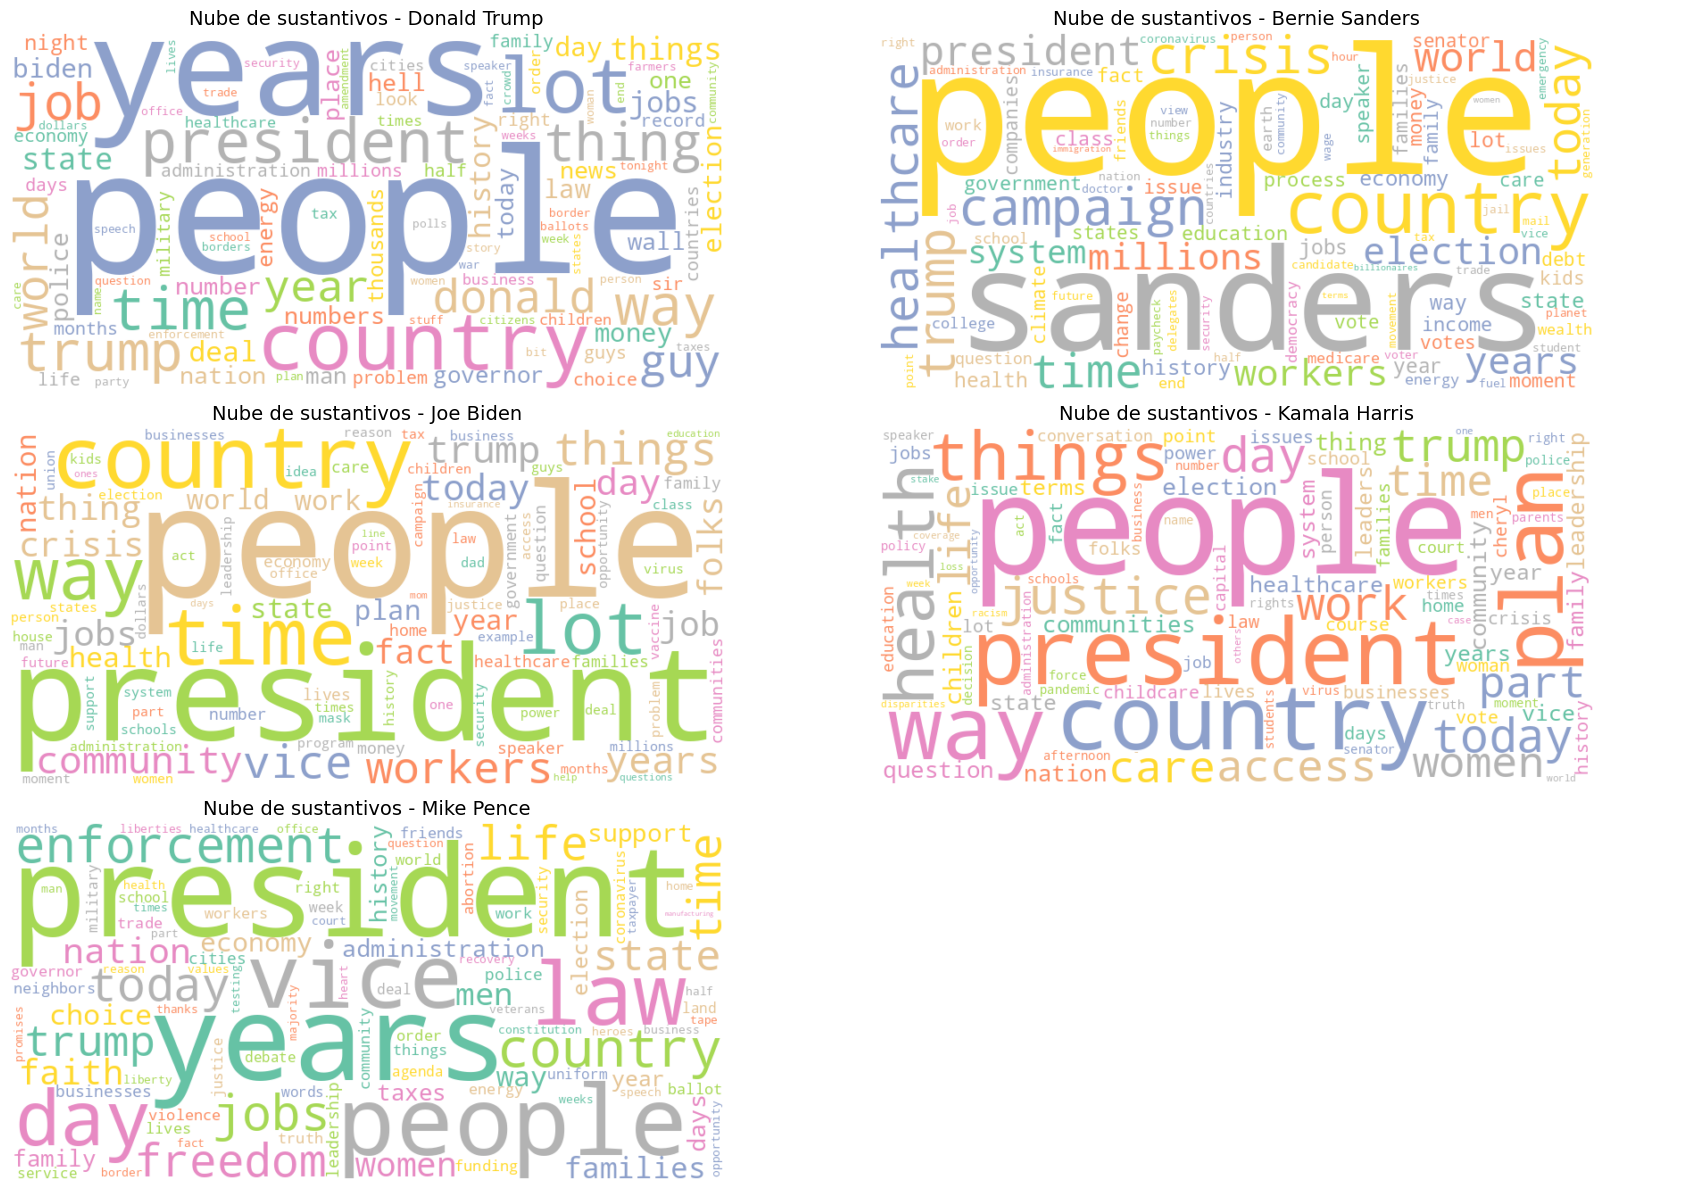

In [ ]:
# ------------------------------------------------------------
# Inicializar spaCy
# ------------------------------------------------------------
# Carga el modelo en inglés de spaCy para POS‐tagging
nlp = spacy.load("en_core_web_sm")

# Asegúrate de tener descargadas las stopwords de NLTK
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# ------------------------------------------------------------
#Preparar figura con 3x2 subplots
# ------------------------------------------------------------
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

# ------------------------------------------------------------
# Para cada candidato, extraer únicamente los NOUNs
# ------------------------------------------------------------
for idx, speaker in enumerate(df_top5["speaker"].unique()):
    # 2.1. Recuperar listas de palabras de cada discurso
    lists_of_words = df_top5[df_top5["speaker"] == speaker]["WordList"]

    noun_words = []
    for word_list in lists_of_words:
        text = " ".join(word_list)       # Concatenar en una cadena
        doc  = nlp(text)                 # POS‐tagging con spaCy
        # Filtrar sólo tokens que spaCy etiqueta como sustantivo ("NOUN")
        nouns = [tok.text for tok in doc if tok.pos_ == "NOUN"]
        noun_words.extend(nouns)

    # 2.2. Eliminar stopwords para quedarnos con términos con valor
    filtered_nouns = [
        w for w in noun_words
        if w.lower() not in stop_words
    ]

    # 2.3. Contar frecuencias y generar WordCloud
    freqs = Counter(filtered_nouns)
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap="Set2",
        max_words=100
    ).generate_from_frequencies(freqs)

    # 2.4. Mostrar en su subplot
    axes[idx].imshow(wc, interpolation="bilinear")
    axes[idx].set_title(f"Nube de sustantivos - {speaker}", fontsize=14)
    axes[idx].axis("off")

# ------------------------------------------------------------
# Apagar el subplot sobrante si sólo hay 5 candidatos
# ------------------------------------------------------------
for ax in axes[len(df_top5["speaker"].unique()):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# #NOUNS (con wordnet)

# import spacy
# import nltk
# from nltk.corpus import stopwords
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# from collections import Counter
# nltk.download('wordnet')
# from nltk.corpus import wordnet as wn
# nouns = list(wn.all_lemma_names(pos='n'))


# fig, axes = plt.subplots(3, 2, figsize=(18, 12))
# axes = axes.flatten()

# for idx, speaker in enumerate(df_top5['speaker'].unique()):
#     # Filtrar discursos del candidato
#     candidate_words = df_top5[df_top5['speaker'] == speaker]["WordList"]

#     # Eliminar stopwords
#     filtered_words = [word for word in noun_words if word.lower() in nouns]

#     # Contar palabras
#     word_counts = Counter(filtered_words)

#     # Crear la nube de palabras
#     wc = WordCloud(
#         width=800,
#         height=400,
#         background_color='white',
#         colormap='Set2',
#         max_words=100
#     ).generate_from_frequencies(word_counts)

#     # Mostrar en subplot
#     axes[idx].imshow(wc, interpolation='bilinear')
#     axes[idx].set_title(f"Nube de palabras - {speaker}", fontsize=14)
#     axes[idx].axis('off')

# # Ocultar subplots vacíos si hay menos de 6 candidatos
# for i in range(len(df_top5['speaker'].unique()), len(axes)):
#     axes[i].axis('off')

# plt.tight_layout()
# plt.show()

#####Adjetivos

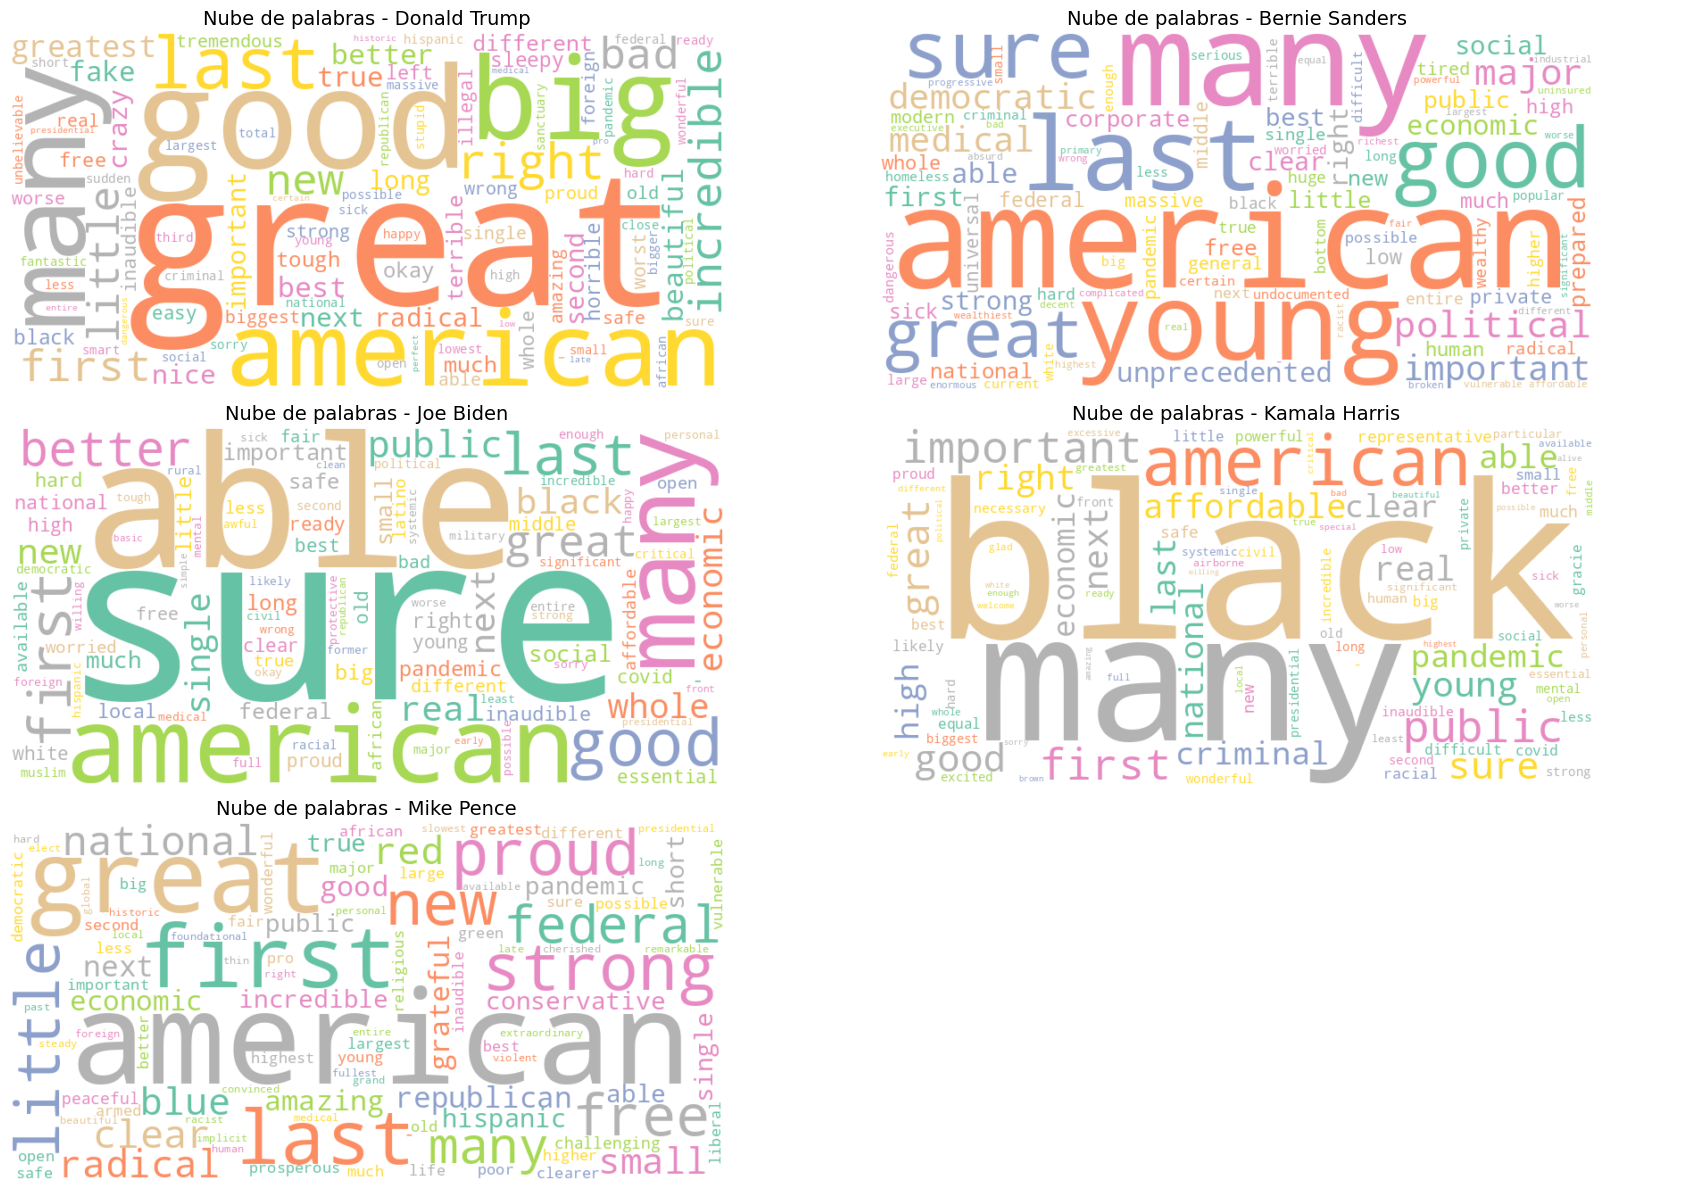

In [ ]:
#ADJECTIVE (con token_pos)

import spacy
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, speaker in enumerate(df_top5['speaker'].unique()):
    # Filtrar discursos del candidato
    candidate_words = df_top5[df_top5['speaker'] == speaker]["WordList"]

    adjective_words = []

    for word_list in candidate_words:
        text = " ".join(word_list)
        doc = nlp(text)
        adjective = [token.text for token in doc if token.pos_ == "ADJ"]
        adjective_words.extend(adjective)

    # Eliminar stopwords
    filtered_words = [word for word in adjective_words if word.lower() not in stop_words]

    # Contar palabras
    word_counts = Counter(filtered_words)

    # Crear la nube de palabras
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='Set2',
        max_words=100
    ).generate_from_frequencies(word_counts)

    # Mostrar en subplot
    axes[idx].imshow(wc, interpolation='bilinear')
    axes[idx].set_title(f"Nube de palabras - {speaker}", fontsize=14)
    axes[idx].axis('off')

# Ocultar subplots vacíos si hay menos de 6 candidatos
for i in range(len(df_top5['speaker'].unique()), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# #ADJECTIVE (con wordnet)

# import spacy
# import nltk
# from nltk.corpus import stopwords
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# from collections import Counter
# nltk.download('wordnet')
# from nltk.corpus import wordnet as wn
# adjectives = list(wn.all_lemma_names(pos='a'))


# fig, axes = plt.subplots(3, 2, figsize=(18, 12))
# axes = axes.flatten()

# for idx, speaker in enumerate(df_top5['speaker'].unique()):
#     # Filtrar discursos del candidato
#     candidate_words = df_top5[df_top5['speaker'] == speaker]["WordList"]

#     # Eliminar stopwords
#     filtered_words = [word for word in noun_words if word.lower() in adjectives]

#     # Contar palabras
#     word_counts = Counter(filtered_words)

#     # Crear la nube de palabras
#     wc = WordCloud(
#         width=800,
#         height=400,
#         background_color='white',
#         colormap='Set2',
#         max_words=100
#     ).generate_from_frequencies(word_counts)

#     # Mostrar en subplot
#     axes[idx].imshow(wc, interpolation='bilinear')
#     axes[idx].set_title(f"Nube de palabras - {speaker}", fontsize=14)
#     axes[idx].axis('off')

# # Ocultar subplots vacíos si hay menos de 6 candidatos
# for i in range(len(df_top5['speaker'].unique()), len(axes)):
#     axes[i].axis('off')

# plt.tight_layout()
# plt.show()

#####Verbos

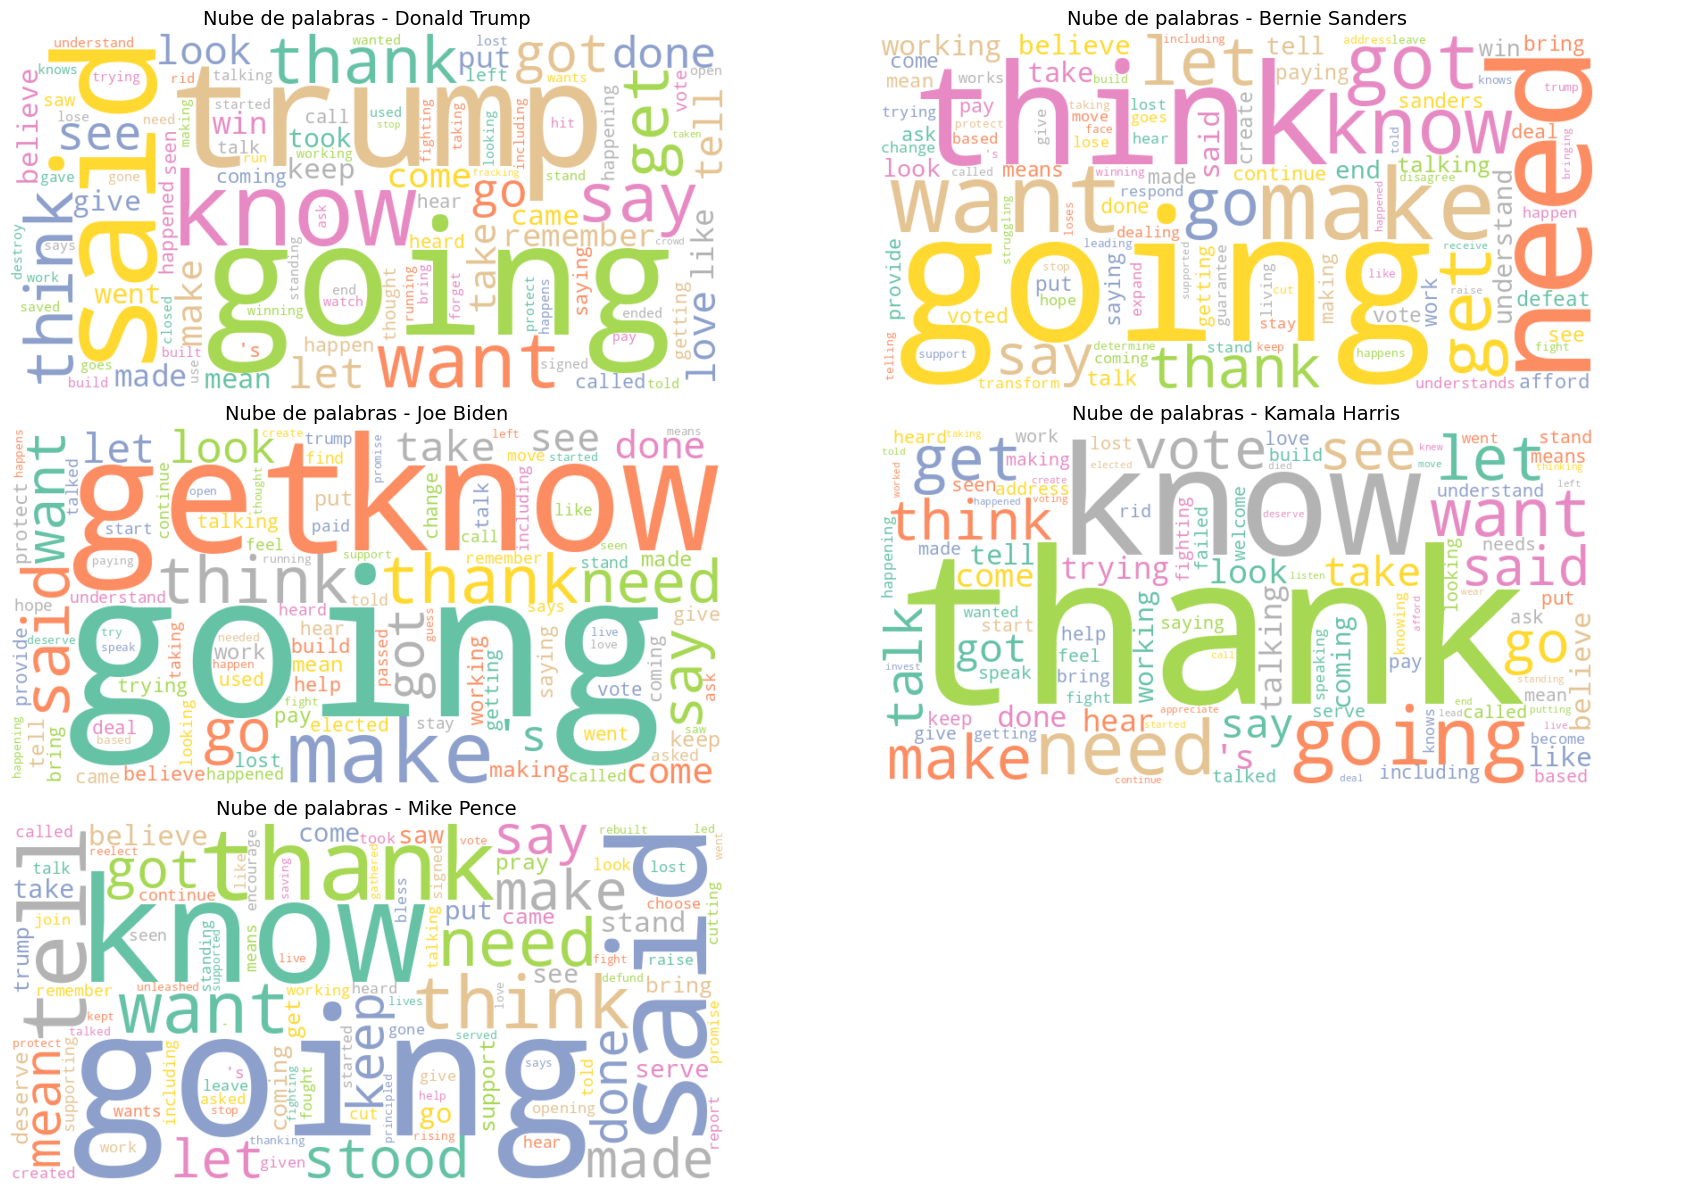

In [ ]:
#VERBS (con token_pos)

import spacy
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, speaker in enumerate(df_top5['speaker'].unique()):
    # Filtrar discursos del candidato
    candidate_words = df_top5[df_top5['speaker'] == speaker]["WordList"]

    verb_words = []

    for word_list in candidate_words:
        text = " ".join(word_list)
        doc = nlp(text)
        verb = [token.text for token in doc if token.pos_ == "VERB"]
        verb_words.extend(verb)

    # Eliminar stopwords
    filtered_words = [word for word in verb_words if word.lower() not in stop_words]

    # Contar palabras
    word_counts = Counter(filtered_words)

    # Crear la nube de palabras
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='Set2',
        max_words=100
    ).generate_from_frequencies(word_counts)

    # Mostrar en subplot
    axes[idx].imshow(wc, interpolation='bilinear')
    axes[idx].set_title(f"Nube de palabras - {speaker}", fontsize=14)
    axes[idx].axis('off')

# Ocultar subplots vacíos si hay menos de 6 candidatos
for i in range(len(df_top5['speaker'].unique()), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# #VERBS (con wordnet)

# import spacy
# import nltk
# from nltk.corpus import stopwords
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# from collections import Counter
# nltk.download('wordnet')
# from nltk.corpus import wordnet as wn
# verbs = list(wn.all_lemma_names(pos='v'))


# fig, axes = plt.subplots(3, 2, figsize=(18, 12))
# axes = axes.flatten()

# for idx, speaker in enumerate(df_top5['speaker'].unique()):
#     # Filtrar discursos del candidato
#     candidate_words = df_top5[df_top5['speaker'] == speaker]["WordList"]

#     # Eliminar stopwords
#     filtered_words = [word for word in noun_words if word.lower() in verbs]

#     # Contar palabras
#     word_counts = Counter(filtered_words)

#     # Crear la nube de palabras
#     wc = WordCloud(
#         width=800,
#         height=400,
#         background_color='white',
#         colormap='Set2',
#         max_words=100
#     ).generate_from_frequencies(word_counts)

#     # Mostrar en subplot
#     axes[idx].imshow(wc, interpolation='bilinear')
#     axes[idx].set_title(f"Nube de palabras - {speaker}", fontsize=14)
#     axes[idx].axis('off')

# # Ocultar subplots vacíos si hay menos de 6 candidatos
# for i in range(len(df_top5['speaker'].unique()), len(axes)):
#     axes[i].axis('off')

# plt.tight_layout()
# plt.show()

#####Plurales

In [ ]:
# #plurales

# import spacy
# import nltk
# from nltk.corpus import stopwords
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# from collections import Counter
# nltk.download('wordnet')
# from nltk.corpus import wordnet as wn
# nouns = list(wn.all_lemma_names(pos='n'))
# adjectives = list(wn.all_lemma_names(pos='a'))
# verbs = list(wn.all_lemma_names(pos='v'))


# fig, axes = plt.subplots(3, 2, figsize=(18, 12))
# axes = axes.flatten()

# for idx, speaker in enumerate(df_top5['speaker'].unique()):
#     # Filtrar discursos del candidato
#     candidate_words = df_top5[df_top5['speaker'] == speaker]["WordList"]

#     # Eliminar stopwords
#     filtered_words = [word for word in noun_words if word.lower() not in nouns and word.lower() not in adjectives and word.lower() not in verbs]

#     # Contar palabras
#     word_counts = Counter(filtered_words)

#     # Crear la nube de palabras
#     wc = WordCloud(
#         width=800,
#         height=400,
#         background_color='white',
#         colormap='Set2',
#         max_words=100
#     ).generate_from_frequencies(word_counts)

#     # Mostrar en subplot
#     axes[idx].imshow(wc, interpolation='bilinear')
#     axes[idx].set_title(f"Nube de palabras - {speaker}", fontsize=14)
#     axes[idx].axis('off')

# # Ocultar subplots vacíos si hay menos de 6 candidatos
# for i in range(len(df_top5['speaker'].unique()), len(axes)):
#     axes[i].axis('off')

# plt.tight_layout()
# plt.show()

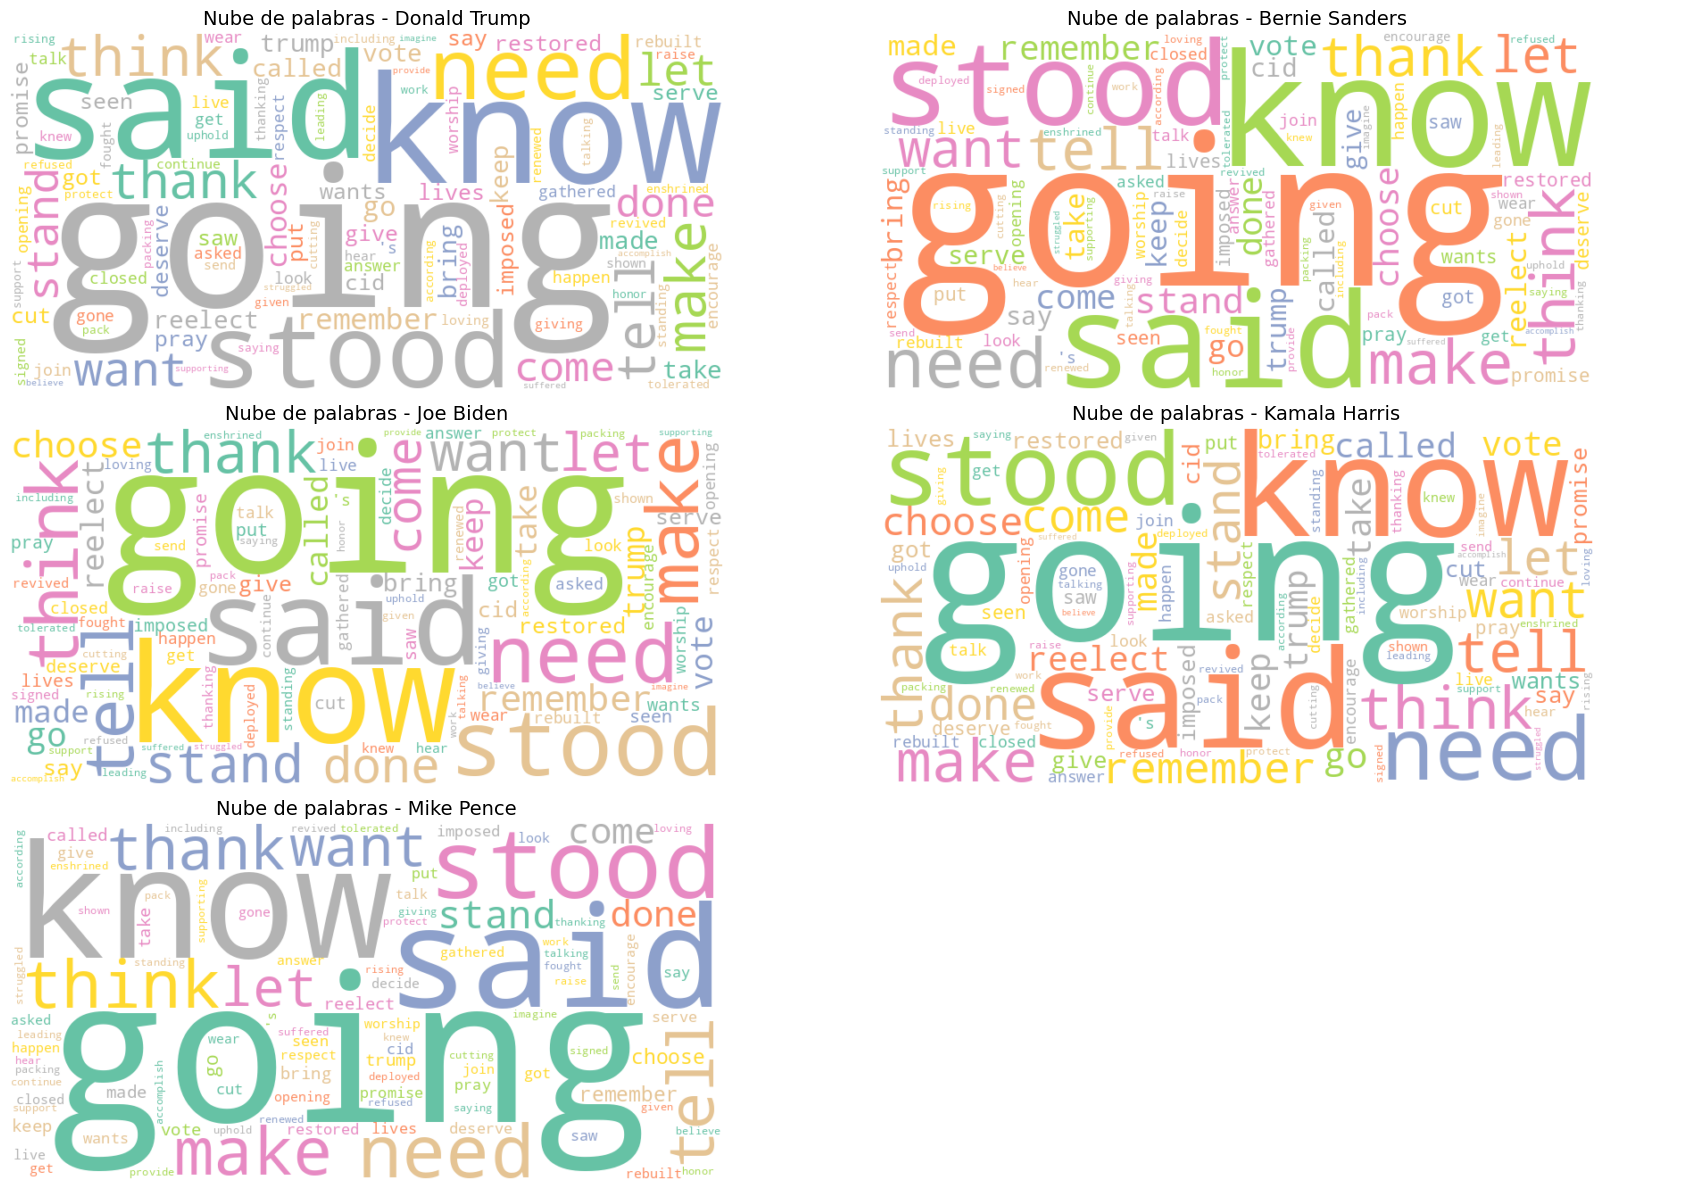

['cid', 'have', 'want', 'thank', 'allowing', 'think', 'had', 'going', 'make', 'going', 'continue', 'vote', 'want', 'direct', 'watch', 'want', 'need', 'pedro', 'cid', 'have', 'make', 'done', 'going', 'do', 'shown', 'had', 'think', 'beat', 'finish', 'going', 'thank', 'cid', 'give', 'cid', 'thank', 'gathered', 'standing', 'accept', 'exiled', 'thank', 'thank', 'need', 'runs', 'born', 'knew', 'knew', 'said', 'know', 'going', 'say', 'join', 'thanking', 'thank', 'winning', 'hear', 'need', 'need', 'send', 'doubling', 'traveling', 'had', 'think', 'thank', 'let', 'leads', 'sets', 'compare', 'need', 'reelect', 'trump', 'think', 'come', 'begins', 'providing', 'have', 'tell', 'deployed', 'serve', 'cares', 'signed', 'rebuilt', 'restored', 'giving', 'need', 'renewed', 'stood', 'stood', 'stood', 'stood', 'loving', 'placed', 'called', 'release', 'learned', 'stood', 'imposed', 'carry', 'promise', 'going', 'continue', 'stand', 'stood', 'made', 'go', 'restored', 'imposed', 'deployed', 'interdict', 'indict

In [ ]:
#conjugaciones



fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, speaker in enumerate(df_top5['speaker'].unique()):
    # Filtrar discursos del candidato
    candidate_words = df_top5[df_top5['speaker'] == speaker]["WordList"]

    rest_words = []

    for word_list in candidate_words:
        text = " ".join(word_list)
        doc = nlp(text)
        rest = [token.text for token in doc if token.pos_ not in ["NOUN", "VERB", "ADJ"]]
        rest_words.extend(verb)

    # Eliminar stopwords
    filtered_words = [word for word in rest_words if word.lower() not in stop_words]

    # Contar palabras
    word_counts = Counter(filtered_words)

    # Crear la nube de palabras
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='Set2',
        max_words=100
    ).generate_from_frequencies(word_counts)

    # Mostrar en subplot
    axes[idx].imshow(wc, interpolation='bilinear')
    axes[idx].set_title(f"Nube de palabras - {speaker}", fontsize=14)
    axes[idx].axis('off')

# Ocultar subplots vacíos si hay menos de 6 candidatos
for i in range(len(df_top5['speaker'].unique()), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()
print(rest_words)

#####Matriz y mapa de grafos

In [ ]:

# TODO: Busque los candidatos/as con mayor cantidad de palabras.
#También buscamos cantidad de palabras diferentes?? (léxico del candidato) / variedad y cantidad
#qué hacemos con el apóstrofe, explicitándolo
#En inglés, las palabras con apóstrofe generalmente se consideran una sola palabra en la mayoría de los contextos lingüísticos,
#incluyendo procesamiento de texto, conteo de palabras y análisis sintáctico.
#Contar palabras por cada discurso (longitud de la lista de palabras en cada fila)
df_top5["WordCount"] = df_top5["WordList"].apply(len)

# Agrupar por candidato y sumar las palabras
word_counts_per_speaker = df_top5.groupby('speaker')['WordCount'].sum()

# Ordenar de mayor a menor
word_counts_per_speaker = word_counts_per_speaker.sort_values(ascending=False)

# Mostrar los candidatos con más palabras
print(word_counts_per_speaker)


In [ ]:
# TODO: Construya una matriz de 5x5, donde cada fila y columna corresponden a un candiato/a,
# y la entrada (i,j) contiene la cantidad de veces que el candiato/a “i” menciona al candiato/a “j”.
#Quizá sea bueno usar solo los apellidos
#Hacer conteo de nombres y apellidos y ver si hay descuadre

# Crear la lista de candidatos (basado en los 5 más comunes que ya tienes)
candidates = df_top5['speaker'].unique()

# Crear la matriz vacía 5x5
mention_matrix = pd.DataFrame(0, index=candidates, columns=candidates)

# Función para contar menciones entre dos candidatos
def count_mentions(text, target_candidates):
    # Convertir el texto a minúsculas para que la búsqueda no distinga entre mayúsculas/minúsculas
    text = text.lower()
    mentions = {candidate: text.count(candidate.lower()) for candidate in target_candidates}
    return mentions

# Iterar sobre los discursos de cada candidato y contar menciones a otros
for idx, speaker in enumerate(candidates):
    # Filtrar los discursos del candidato
    candidate_texts = df_top5[df_top5['speaker'] == speaker]['CleanText']

    # Contar menciones para cada discurso
    for text in candidate_texts:
        mentions = count_mentions(text, candidates)

        # Llenar la matriz con las menciones
        for target, count in mentions.items():
            mention_matrix.at[speaker, target] += count

# Mostrar la matriz final
print(mention_matrix)

# mentions_matrix = ...

# Opcional: Genere un grafo dirigido con esa matriz de adyacencia para visualizar las menciones.
# Puede ser util la biblioteca networkx

In [ ]:

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar los nodos (candidatos)
for candidate in candidates:
    G.add_node(candidate)

# Agregar las aristas con los pesos (número de menciones)
for i in range(len(candidates)):
    for j in range(len(candidates)):
        # Si el número de menciones es mayor que 0, agregamos una arista
        if mention_matrix.iloc[i, j] > 0:
            G.add_edge(candidates[i], candidates[j], weight=mention_matrix.iloc[i, j])

# Dibujar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Layout para distribuir los nodos
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', arrowsize=20)

# Etiquetar las aristas con el peso (número de menciones)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Mostrar el grafo
plt.title("Grafo de Menciones entre Candidatos")
plt.show()


In [ ]:
#------------------------------------------------------------------------------
#Matriz de menciones tomando menciones de cualquier manera (nombre_apellido)
#------------------------------------------------------------------------------

def nombre_apellido1(df, column_name):

    # Eliminar primeras palabras hasta el primer "\n"
    result = df[column_name].str.replace(r"^[^\n]*\n", "", regex=True)
    #"nombre apellido" a "nombre_apellido"
    result = result.str.replace("Joe Biden", "Biden", regex=False)
    result = result.str.replace("Donald Trump", "Trump", regex=False)
    result = result.str.replace("Mike Pence", "Pence", regex=False)
    result = result.str.replace("Bernie Sanders", "Sanders", regex=False)
    result = result.str.replace("Kamala Harris", "Harris", regex=False)

    return result

df_speeches["mention_n_a"] = nombre_apellido1(df_speeches, "text")


def nombre_apellido2(df, column_name):

    # Eliminar primeras palabras hasta el primer "\n"
    result = df[column_name].str.replace(r"^[^\n]*\n", "", regex=True)
    #"nombre apellido" a "nombre_apellido"
    result = result.str.replace("Joe", "Biden", regex=False)
    result = result.str.replace("Donald", "Trump", regex=False)
    result = result.str.replace("Mike", "Pence", regex=False)
    result = result.str.replace("Bernie", "Sanders", regex=False)
    result = result.str.replace("Kamala", "Harris", regex=False)

    return result

df_speeches["mention_a"] = nombre_apellido2(df_speeches, "mention_n_a")

def nombre_apellido3(df, column_name):

    # Eliminar primeras palabras hasta el primer "\n"
    result = df[column_name].str.replace(r"^[^\n]*\n", "", regex=True)
    #"nombre apellido" a "nombre_apellido"
    result = result.str.replace("Biden", "Joe Biden", regex=False)
    result = result.str.replace("Trump", "Donald Trump", regex=False)
    result = result.str.replace("Pence", "Mike Pence", regex=False)
    result = result.str.replace("Sanders", "Bernie Sanders", regex=False)
    result = result.str.replace("Harris", "Kamala Harris", regex=False)

    return result

df_speeches["mention_na"] = nombre_apellido3(df_speeches, "mention_a")


# Crear la lista de candidatos (basado en los 5 más comunes que ya tienes)
candidates = df_top5['speaker'].unique()

# Crear la matriz vacía 5x5
mention_matrix = pd.DataFrame(0, index=candidates, columns=candidates)

# Función para contar menciones entre dos candidatos
def count_mentions(text, target_candidates):
    # Convertir el texto a minúsculas para que la búsqueda no distinga entre mayúsculas/minúsculas
    text = text.lower()
    mentions = {candidate: text.count(candidate.lower()) for candidate in target_candidates}
    return mentions

# Iterar sobre los discursos de cada candidato y contar menciones a otros
for idx, speaker in enumerate(candidates):
    # Filtrar los discursos del candidato
    candidate_texts = df_speeches[df_speeches['speaker'] == speaker]['mention_na']

    # Contar menciones para cada discurso
    for text in candidate_texts:
        mentions = count_mentions(text, candidates)

        # Llenar la matriz con las menciones
        for target, count in mentions.items():
            mention_matrix.at[speaker, target] += count

mention_matrix

Donald Trump  Bernie Sanders  Joe Biden  Kamala Harris  \
Donald Trump            5551             244       1391            107   
Bernie Sanders           144             530        241              1   
Joe Biden                990              62       3289             94   
Kamala Harris            122               5        281            438   
Mike Pence               588              11        462             82   

                Mike Pence  
Donald Trump           256  
Bernie Sanders           0  
Joe Biden               28  
Kamala Harris            8  
Mike Pence             840

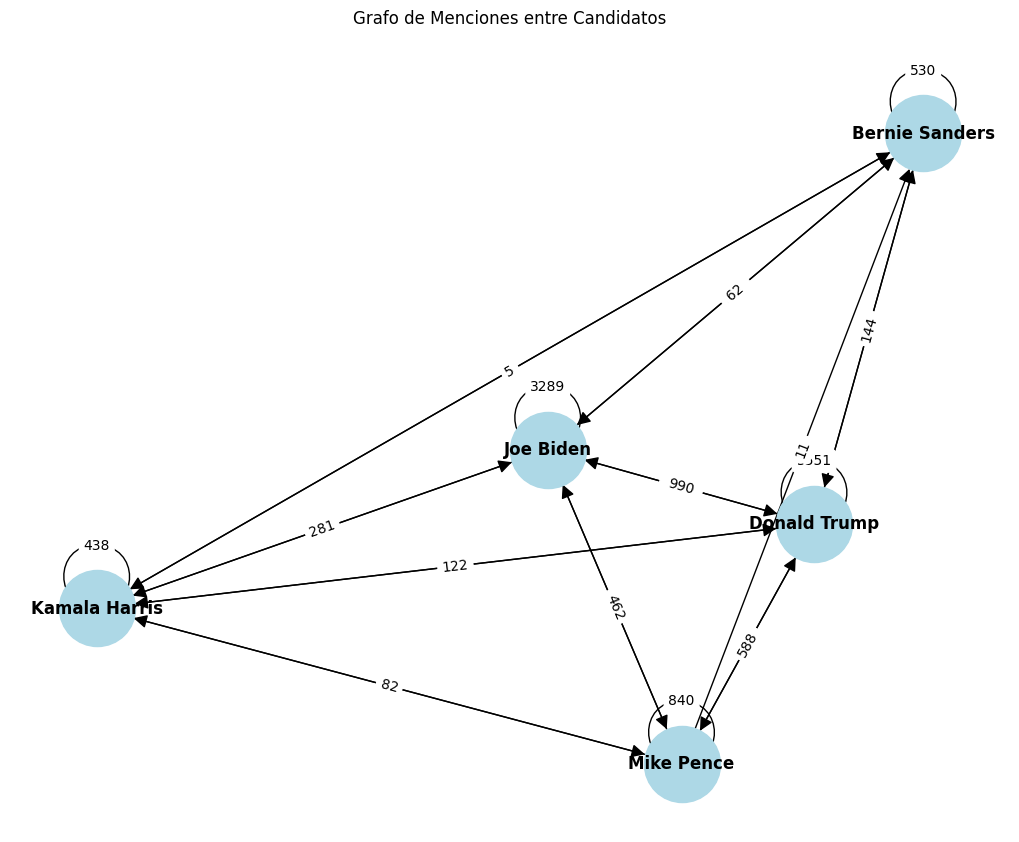

In [ ]:

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar los nodos (candidatos)
for candidate in candidates:
    G.add_node(candidate)

# Agregar las aristas con los pesos (número de menciones)
for i in range(len(candidates)):
    for j in range(len(candidates)):
        # Si el número de menciones es mayor que 0, agregamos una arista
        if mention_matrix.iloc[i, j] > 0:
            G.add_edge(candidates[i], candidates[j], weight=mention_matrix.iloc[i, j])

# Dibujar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Layout para distribuir los nodos
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', arrowsize=20)

# Etiquetar las aristas con el peso (número de menciones)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Mostrar el grafo
plt.title("Grafo de Menciones entre Candidatos")
plt.show()